<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone III</font></h2>

<h1><font color="#00586D" size=5>Exploraci√≥n sobre la base de datos de pel√≠culas</font></h1>
<br><br><br>


<div align="right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>M√°ster en Ciencia de Datos e Ingenier√≠a de Datos en la Nube</font><br>
<font color="#00586D" size=3>Universidad de Castilla-La Mancha</font>

</div>
<br>

---
<br>

En este proyecto se parte de un conjunto de datos sobre pel√≠culas y valoraciones sobre las mismas disponibles en _Internet Movie Database (IMDB)_. Esta informaci√≥n se ha enriquecido con datos adicionales obtenidos mediante consultas a la API de otro sitio, _The Movie Database (TMDB)_. Como resultado de este proceso, se han generado  tres conjuntos de datos: `df_movies`, con informaci√≥n sobre pel√≠culas, g√©neros, y valoraciones;  `df_people`, con informaci√≥n sobre las personas; y `df_credits` con informaci√≥n sobre las personas que participan en cada pel√≠cula (director y tres actores principales). A partir de √©stos, se llevar√° a cabo un an√°lisis exploratorio.
  
El modo en que se desarrolla el an√°lisis depende en gran medida _de los datos disponibles_ y de unos _objetivos_ que pueden ser generales, o la respuesta a cuestiones concretas, y que pueden variar o ampliarse en funci√≥n de los resultados intermedios que vaya arrojando el proceso. En este proyecto se partir√° de una situaci√≥n hipot√©tica inicial en la que se estudian las condiciones para la inversi√≥n en una pel√≠cula de _presupuesto relativamente bajo_. Para ello, se analizar√°n qu√© factores tienen m√°s incidencia en el √©xito de una pel√≠cula, que consideraremos que puede cuantificarse por los ingresos que ha obtenido, o por el n√∫mero de votos y valoraci√≥n en _IMDB_. Tambi√©n se estudiar√°n las diferencias entre g√©neros con el fin de seleccionar los m√°s adecuados, y se analizar√° la relevancia de directores, actores, y actrices, y cuales podr√≠an ser los m√°s adecuados. Adem√°s, y paralelamente, se obtendr√° alguna informaci√≥n adicional que, si bien puede no est√°r relacionada con el objetivo principal, puede resultar de inter√©s. 

Para llevar a cabo la exploraci√≥n, se propondr√°n una serie de ejercicios que consisten en la obtenci√≥n de gr√°ficas o datos concretos. Por √∫ltimo, este proyecto no tiene porqu√© ce√±irse a la resoluci√≥n de los ejercicios, sino que cabe la posibilidad de dar respuesta a cuestiones distintas a las propuestas en la libreta.



<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Una parte esencial de la exploraci√≥n es la validaci√≥n y limpieza de los datos. Como esta parte es m√°s "√°rida", en este proyecto nos centraremos en la exploraci√≥n propiamente dicha. En el Capstone V veremos un caso en el que la preparaci√≥n de los datos es algo m√°s compleja.
</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>√çndice</font></h2>


* [1. Primera inspecci√≥n](#section1)
  * [1.1 Exploraci√≥n inicial de `df_movies`](#section11)
* [2. Presupuesto](#section2)
  * [2.1 Presupuesto / ingresos](#section21)
  * [2.2 Fecha de estreno como factor de inter√©s](#section22) 
* [3 G√©neros](#section3)  
* [4 Personas](#section4)  
  * [4.1 Directores](#section41)
  * [4.2 Reparto](#section42) 
* [5 Pel√≠culas de bajo presupuesto](#section5)  
* [6. Conclusi√≥n](#section6)

---

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section1"></a>
## <font color="#00586D"> 1. Primera inspecci√≥n</font>
<br>

El primer paso en el an√°lisis exploratorio consiste en obtener una primera descripci√≥n del conjunto de datos como tal, y que incluye aspectos como: archivos; caracter√≠sticas, relaciones entre ellas, significado y tipos de datos con que se representan; existencia o frecuencia de valores perdidos, etc. A continuaci√≥n se lee y se muestra la cabecera de cada uno de los tres *DataFrame*, y se inspecciona su estructura.


#### `df_movies`

In [6]:
df_movies = pd.read_csv('data/df_movies.csv', index_col='movie_id', sep=';', parse_dates=['release_date'])
display(df_movies.head(2))
df_movies.info()

title                   genres  avg_rating  \
movie_id                                                                      
tt0010323  The Cabinet of Dr. Caligari  Horror,Mystery,Thriller         8.0   
tt0012349                      The Kid      Comedy,Drama,Family         8.3   

           num_votes  budget  revenue release_date original_language  \
movie_id                                                               
tt0010323      64516   18000     8811   1920-02-27                de   
tt0012349     126789  250000  2500000   1921-01-21                en   

           popularity                                           keywords  
movie_id                                                                  
tt0010323      14.790  insane asylum,black and white,cult film,silent...  
tt0012349      14.697  angel,suicide attempt,fistfight,slapstick come...

<class 'pandas.core.frame.DataFrame'>
Index: 3824 entries, tt0010323 to tt9893250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              3824 non-null   object        
 1   genres             3824 non-null   object        
 2   avg_rating         3824 non-null   float64       
 3   num_votes          3824 non-null   int64         
 4   budget             3824 non-null   int64         
 5   revenue            3824 non-null   int64         
 6   release_date       3824 non-null   datetime64[ns]
 7   original_language  3824 non-null   object        
 8   popularity         3824 non-null   float64       
 9   keywords           3809 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 328.6+ KB


Puede apreciarse que todos los tipos de datos son los esperados, y que aparentemente no hay datos perdidos salvo en el caso de las palabras clave (que no se utilizar√°n en este proyecto).

#### `df_people`

In [7]:
df_people = pd.read_csv('data/df_people.csv', index_col='people_id', sep=';')
display(df_people.head(2))
df_people.info()

name  popularity    imdb_id  gender
people_id                                                
2991          Robert Wiene       1.886  nm0927468       2
13848      Charlie Chaplin      15.496  nm0000122       2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5791 entries, 2991 to 52775
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5791 non-null   object 
 1   popularity  5791 non-null   float64
 2   imdb_id     5748 non-null   object 
 3   gender      5791 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 226.2+ KB


Los datos corresponden tambi√©n a lo esperado, y que existen valores perdidos para la columna `imdb_id`. Se sobreentiende que algunos de los directores/actores no tienen identificador en la plataforma `IMDb`.

#### `df_credits`

In [8]:
df_credits = pd.read_csv('data/df_credits.csv', sep=';')
display(df_credits.head(2))
df_credits.info()

people_id   movie_id       rol
0       2991  tt0010323  director
1      13848  tt0012349  director

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15606 entries, 0 to 15605
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   people_id  15606 non-null  int64 
 1   movie_id   15606 non-null  object
 2   rol        15606 non-null  object
dtypes: int64(1), object(2)
memory usage: 365.9+ KB


Puede observarse que tampoco existen valores perdidos en este conjunto, y que la codificaci√≥n de los datos es correcta.


Como consecuencia de esta primera aproximaci√≥n, se concluye que no es necesario hacer ning√∫n tipo de preprocesamiento, ni adaptar el proceso a la limpieza de datos, por lo que la exploraci√≥n se centrar√° en la informaci√≥n.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section11"></a>
### <font color="#00586D"> 1.1 Exploraci√≥n inicial de `df_movies` </font>
<br>

El *DataFrame* `df_movies` es el n√∫cleo del conjunto de datos, y entorno al cual debe desarrollarse la exploraci√≥n. Contiene informaci√≥n identificativa, cualitativa, y cuantitativa sobre cada pel√≠cula. En primer lugar se har√° una inspecci√≥n de los datos para comprobar si existen valores extremos.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 1</font>

Obtener una descripci√≥n de las columnas num√©ricas del *DataFrame* `df_movies`. Con el fin de observar si existen valores extremos y en qu√© proporci√≥n, incorporar a los resultados los cuantiles `[0.25, 0.5, 0.75, 0.95, 0.99, 0.995]`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se puede utilizar `DataFrame.describe()`

</details>  

In [9]:
df_movies.describe(include="number", percentiles = [0.25, 0.5, 0.75, 0.95, 0.99, 0.995])

avg_rating     num_votes        budget       revenue   popularity
count  3824.000000  3.824000e+03  3.824000e+03  3.824000e+03  3824.000000
mean      6.846810  1.948407e+05  4.229992e+07  1.424842e+08    50.848736
std       0.914069  2.245797e+05  4.997971e+07  2.189518e+08   122.146243
min       1.000000  5.003300e+04  0.000000e+00  0.000000e+00     0.600000
25%       6.300000  7.371000e+04  7.000000e+06  2.073692e+07    16.158250
50%       6.900000  1.157800e+05  2.500000e+07  6.827535e+07    24.984000
75%       7.500000  2.192848e+05  6.000000e+07  1.707762e+08    49.250000
95%       8.200000  6.222014e+05  1.500000e+08  5.438717e+08   153.238750
99%       8.500000  1.144504e+06  2.085400e+08  1.047176e+09   373.312660
99.5%     8.700000  1.393663e+06  2.500000e+08  1.242341e+09   689.647770
max       9.300000  2.660316e+06  3.800000e+08  2.920357e+09  4328.431000

<!--comment -->

Algo que se observa es que existen pel√≠culas para las que el presupuesto y/o la recaudaci√≥n son cero, lo que realmente corresponde a un valor perdido. Se van a tratar de forma distinta ambas columnas. Puesto que la recaudaci√≥n es el factor de m√°s inter√©s, se eliminar√°n las pel√≠culas para las que no la conozcamos. 

Eliminar las pel√≠culas cuyo valor `revenue` es cero (seleccionar aquellas cuya recaudaci√≥n es mayor que cero).

In [10]:
df_movies = df_movies.drop(df_movies[df_movies['revenue']==0].index)

In [11]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3552 entries, tt0010323 to tt9784798
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              3552 non-null   object        
 1   genres             3552 non-null   object        
 2   avg_rating         3552 non-null   float64       
 3   num_votes          3552 non-null   int64         
 4   budget             3552 non-null   int64         
 5   revenue            3552 non-null   int64         
 6   release_date       3552 non-null   datetime64[ns]
 7   original_language  3552 non-null   object        
 8   popularity         3552 non-null   float64       
 9   keywords           3546 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 305.2+ KB


In [12]:
df_movies[df_movies['revenue']>0]

title                   genres  avg_rating  \
movie_id                                                                      
tt0010323  The Cabinet of Dr. Caligari  Horror,Mystery,Thriller         8.0   
tt0012349                      The Kid      Comedy,Drama,Family         8.3   
tt0013442                    Nosferatu           Fantasy,Horror         7.9   
tt0015648          Battleship Potemkin   Drama,History,Thriller         7.9   
tt0015864                The Gold Rush   Adventure,Comedy,Drama         8.2   
...                                ...                      ...         ...   
tt9620292        Promising Young Woman      Crime,Drama,Mystery         7.5   
tt9639470           Last Night in Soho     Drama,Horror,Mystery         7.1   
tt9731534              The Night House  Horror,Mystery,Thriller         6.5   
tt9770150                    Nomadland                    Drama         7.3   
tt9784798  Judas and the Black Messiah  Biography,Drama,History         7.4   

           num_votes    budget   revenue release_date original_language  \
movie_id                                                                  
tt0010323      64516     18000      8811   1920-02-27                de   
tt0012349     126789    250000   2500000   1921-01-21                en   
tt0013442      98252         0     19054   1922-02-16                de   
tt0015648      58131         0     45100   1925-12-24                ru   
tt0015864     111760    923000   4000000   1925-07-12                en   
...              ...       ...       ...          ...               ...   
tt9620292     172013         0  13868965   2020-12-13                en   
tt9639470     134957  43000000  22957625   2021-10-21                en   
tt9731534      53347         0  14590542   2021-07-15                en   
tt9770150     160491   5000000  14784114   2020-12-04                en   
tt9784798      79914  26000000   6416063   2021-02-12                en   

           popularity                                           keywords  
movie_id                                                                  
tt0010323      14.790  insane asylum,black and white,cult film,silent...  
tt0012349      14.697  angel,suicide attempt,fistfight,slapstick come...  
tt0013442      16.524  germany,transylvania,loss of loved one,shapesh...  
tt0015648      14.994  odessa,baby carriage,cossack,panic,slaughter,m...  
tt0015864      14.983  river,gold,dance,worker,cabin,gold rush,thanks...  
...               ...                                                ...  
tt9620292      27.732  ohio,coffee shop,psychopath,horror,sociopath,r...  
tt9639470      69.686  london, england,go-go dancer,nightmare,time tr...  
tt9731534      24.783  depression,nightmare,widow,forest,grief,grievi...  
tt9770150      24.996  factory worker,based on novel or book,recessio...  
tt9784798      20.523  assassination,chicago, illinois,black panther ...  

[3552 rows x 10 columns]

<!--comment -->

 Por otra parte, se visualizan las pel√≠culas en las que los presupuestos que sean igual a cero.

In [13]:
df_movies[df_movies['budget']==0]

title                      genres  avg_rating  \
movie_id                                                                   
tt0013442              Nosferatu              Fantasy,Horror         7.9   
tt0015648    Battleship Potemkin      Drama,History,Thriller         7.9   
tt0041959          The Third Man  Film-Noir,Mystery,Thriller         8.1   
tt0044741                  Ikiru                       Drama         8.3   
tt0050613        Throne of Blood               Drama,History         8.1   
...                          ...                         ...         ...   
tt9100054      The Lost Daughter                       Drama         6.7   
tt9214832                  Emma.        Comedy,Drama,Romance         6.7   
tt9484998           Palm Springs      Comedy,Fantasy,Mystery         7.4   
tt9620292  Promising Young Woman         Crime,Drama,Mystery         7.5   
tt9731534        The Night House     Horror,Mystery,Thriller         6.5   

           num_votes  budget   revenue release_date original_language  \
movie_id                                                                
tt0013442      98252       0     19054   1922-02-16                de   
tt0015648      58131       0     45100   1925-12-24                ru   
tt0041959     172134       0   1226098   1949-08-31                en   
tt0044741      78807       0     55240   1952-10-09                ja   
tt0050613      52578       0     13422   1957-01-15                ja   
...              ...     ...       ...          ...               ...   
tt9100054      64410       0     14521   2021-12-16                en   
tt9214832      54517       0  25155355   2020-02-13                en   
tt9484998     158905       0    164000   2020-07-10                en   
tt9620292     172013       0  13868965   2020-12-13                en   
tt9731534      53347       0  14590542   2021-07-15                en   

           popularity                                           keywords  
movie_id                                                                  
tt0013442      16.524  germany,transylvania,loss of loved one,shapesh...  
tt0015648      14.994  odessa,baby carriage,cossack,panic,slaughter,m...  
tt0041959      15.798  austria,cemetery,black market,grave,soviet mil...  
tt0044741      15.790  bureaucracy,japan,age difference,office,night ...  
tt0050613       9.985  japan,prophecy,based on novel or book,samurai,...  
...               ...                                                ...  
tt9100054      22.755  mother,based on novel or book,beach,greece,dau...  
tt9214832      28.491  based on novel or book,matchmaking,english cou...  
tt9484998      16.876  time travel,swimming pool,romance,palm springs...  
tt9620292      27.732  ohio,coffee shop,psychopath,horror,sociopath,r...  
tt9731534      24.783  depression,nightmare,widow,forest,grief,grievi...  

[178 rows x 10 columns]

<!--comment -->

En principio parecen pel√≠culas que han recibido un gran n√∫mero de votos, y algunas de ellas han conseguido una gran recaudaci√≥n, por lo que no se descartar√°n. Se codificar√°n como *NaN* para tratarlos adecuadamente llegado el caso.

Asignar el valor *NaN* a los valores que son cero en la columna `df_movies['budget']`. 

In [14]:
df_movies['budget'] = df_movies['budget'].replace([0], [np.nan])

In [15]:
df_movies.head()

title                   genres  avg_rating  \
movie_id                                                                      
tt0010323  The Cabinet of Dr. Caligari  Horror,Mystery,Thriller         8.0   
tt0012349                      The Kid      Comedy,Drama,Family         8.3   
tt0013442                    Nosferatu           Fantasy,Horror         7.9   
tt0015648          Battleship Potemkin   Drama,History,Thriller         7.9   
tt0015864                The Gold Rush   Adventure,Comedy,Drama         8.2   

           num_votes    budget  revenue release_date original_language  \
movie_id                                                                 
tt0010323      64516   18000.0     8811   1920-02-27                de   
tt0012349     126789  250000.0  2500000   1921-01-21                en   
tt0013442      98252       NaN    19054   1922-02-16                de   
tt0015648      58131       NaN    45100   1925-12-24                ru   
tt0015864     111760  923000.0  4000000   1925-07-12                en   

           popularity                                           keywords  
movie_id                                                                  
tt0010323      14.790  insane asylum,black and white,cult film,silent...  
tt0012349      14.697  angel,suicide attempt,fistfight,slapstick come...  
tt0013442      16.524  germany,transylvania,loss of loved one,shapesh...  
tt0015648      14.994  odessa,baby carriage,cossack,panic,slaughter,m...  
tt0015864      14.983  river,gold,dance,worker,cabin,gold rush,thanks...

<!--comment -->

Por otra parte, si bien los rangos de las variables son muy amplios en algunos casos, se aprecia una diferencia importante entre el valor **m√°ximo** de la columna `popularity` y el resto. Es necesario por tanto determinar si se trata de un error, o por el contrario existen valores fuera de rango, pero que deben ser considerados dentro del estudio.

Mostrar las 10 filas de `df_movies` con mayor valor de popularidad.

In [16]:
df_movies.nlargest(10,'popularity')

title                      genres  avg_rating  \
movie_id                                                                       
tt6443346                 Black Adam    Action,Adventure,Fantasy         7.0   
tt1745960          Top Gun: Maverick                Action,Drama         8.4   
tt10648342    Thor: Love and Thunder     Action,Adventure,Comedy         6.3   
tt12593682              Bullet Train      Action,Comedy,Thriller         7.3   
tt8041270   Jurassic World: Dominion     Action,Adventure,Sci-Fi         5.7   
tt10872600   Spider-Man: No Way Home    Action,Adventure,Fantasy         8.3   
tt5113044   Minions: The Rise of Gru  Adventure,Animation,Comedy         6.6   
tt1825683              Black Panther     Action,Adventure,Sci-Fi         7.3   
tt0499549                     Avatar    Action,Adventure,Fantasy         7.8   
tt12412888      Sonic the Hedgehog 2     Action,Adventure,Comedy         6.5   

            num_votes       budget     revenue release_date original_language  \
movie_id                                                                        
tt6443346      109213  200000000.0   319000000   2022-10-19                en   
tt1745960      423820  170000000.0  1482656000   2022-05-24                en   
tt10648342     305310  250000000.0   760000000   2022-07-06                en   
tt12593682     171979   90000000.0   239260044   2022-07-03                en   
tt8041270      147762  165000000.0  1001000000   2022-06-01                en   
tt10872600     742520  200000000.0  1916050941   2021-12-15                en   
tt5113044       60622   85000000.0   936000000   2022-06-29                en   
tt1825683      757797  200000000.0  1347597973   2018-02-13                en   
tt0499549     1243973  237000000.0  2920357254   2009-12-15                en   
tt12412888      64453  110000000.0   401800000   2022-03-30                en   

            popularity                                           keywords  
movie_id                                                                   
tt6443346     4328.431  lightning,anti hero,superhero,based on comic,d...  
tt1745960     1491.786  fighter pilot,u.s. navy,sequel,nuclear weapons...  
tt10648342    1404.107  ex-girlfriend,hero,greek mythology,sequel,supe...  
tt12593682    1339.013  japan,assassin,based on novel or book,mission,...  
tt8041270     1267.666  giant monster,dinosaur,child kidnapping,jurass...  
tt10872600    1128.705  new york city,loss of loved one,showdown,secre...  
tt5113044     1036.561   1970s,duringcreditsstinger,minions,gentleminions  
tt1825683     1006.821  africa,superhero,based on comic,aftercreditsst...  
tt0499549      936.245  culture clash,future,space war,space colony,so...  
tt12412888     918.615  sequel,based on video game,duringcreditsstinge...

<!--comment -->

La visualizaci√≥n de los datos permite intuir que la mayor√≠a de las pel√≠culas para las que el valor de la columna `popularity` es extremadamente alto, son conocidas y de alto presupuesto. Llama la atenci√≥n tambi√©n un fen√≥meno, y es que gran parte de ellas se estrenaron el a√±o pasado o √©ste. Eso lleva a pensar si el indicador podr√≠a estar relacionado con una mayor actividad en el sitio web fruto del uso cada vez m√°s intensivo de las redes sociales; o como en el caso de  otras plataformas (*Spotify*, por ejemplo) es un indicador variable que refleja el inter√©s en el momento actual. Esta circunstancia puede comprobarse mostrando la popularidad media de las pel√≠culas por a√±o.


Existen diversas formas de mostrar la relaci√≥n entre popularidad y fecha de estreno, una de ellas es mediante un gr√°fico de barras. Sin embargo, no es la m√°s conveniente debido a que se est√° contemplando un periodo de casi 100 a√±os y ser√≠a m√°s dif√≠cil identificar tendencias. Dibujar una gr√°fica de tipo `sns.lineplot()` que muestre la popularidad media por a√±o. 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* `sns.lineplot()` muestra, para cada valor del eje *x*, la media e intervalo de confianza (obtenido mediante *bootstraping*) de los valores del eje *y* correspondientes.
* Debe pasarse a la funci√≥n, adem√°s de la columna `popularity`, la columna correspondiente a los a√±os de estreno de cada pel√≠cula, accesible mediante `Series.dt.year`.
</details>  


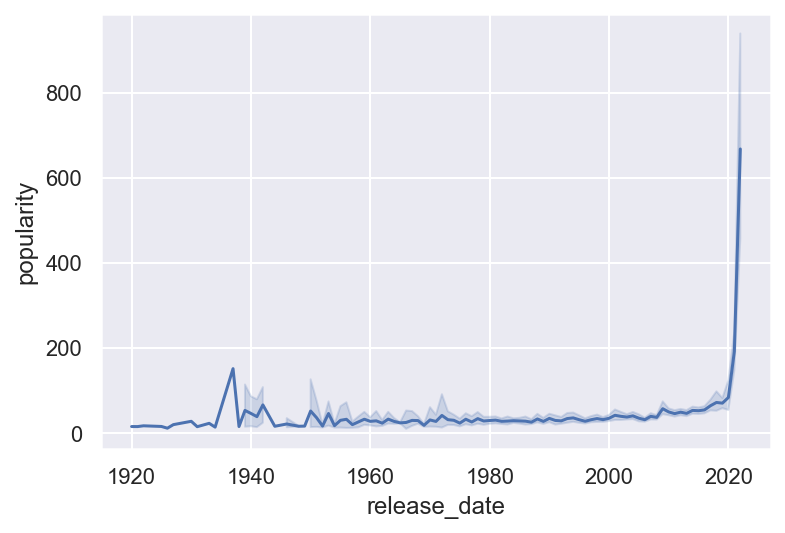

In [17]:
sns.lineplot(data = df_movies, y = 'popularity', x = df_movies['release_date'].dt.year)
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Efectivamente, se muestra que la popularidad de las pel√≠culas crece  con la fecha del estreno, y que se produce un aumento dram√°tico a partir del a√±o 2020, situ√°ndose la media del √∫ltimo a√±o entorno a 650. Esta circunstancia es importante ya que se ha de vigilar el tratamiento que se hace con los valores de la columna `popularity`.

Adem√°s de `popularity`, el *DataFrame* `df_movies` incluye las variables relacionadas directamente con el ***_√©xito_***, que es el objetivo principal del an√°lisis. Como punto de partida se visualizar√°n las variables `avg_rating`, `num_votes`, `revenue`, y `popularity`, as√≠ como las relaciones entre ellas. Existen varias formas de hacerlo, pero *seaborn* permite mostrar toda la informaci√≥n en un solo gr√°fico.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 2</font>

Generar un figura con una matriz de gr√°ficas en las que se muestre, para cada par de variables (de entre las cuatro mencionadas), una gr√°fica de dispersi√≥n; y para cada variable, un histograma.  Esta figura se puede hacer de manera sencilla mediante `seaborn.pairplot()` o `seaborn.PairGrid()`. Debido a que el conjunto de datos contiene informaci√≥n sobre casi 4000 pel√≠culas, es necesario hacer ciertos ajustes sobre las gr√°ficas de dispersi√≥n, como por ejemplo utilizar un tama√±o reducido o transparencia para las marcas. 


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* En este ejercicio hay que seleccionar las columnas de inter√©s, y pasar el *DataFrame* resultante  a la funci√≥n de *Seaborn* (se puede hacer en la misma llamada).
* Mediante `corner=True` se puede mostrar solo una parte de la matriz (que es sim√©trica). A veces es m√°s claro as√≠.
* Por otra parte, es posible pasar argumentos a las gr√°ficas de la diagonal con el diccionario `diag_kws={'arg1':value1, 'arg2':value2,...}`; y a las gr√°ficas bivariadas mediante el diccionario `plot_kws={'arg1':value1, 'arg2':value2,...}`.

</details>   




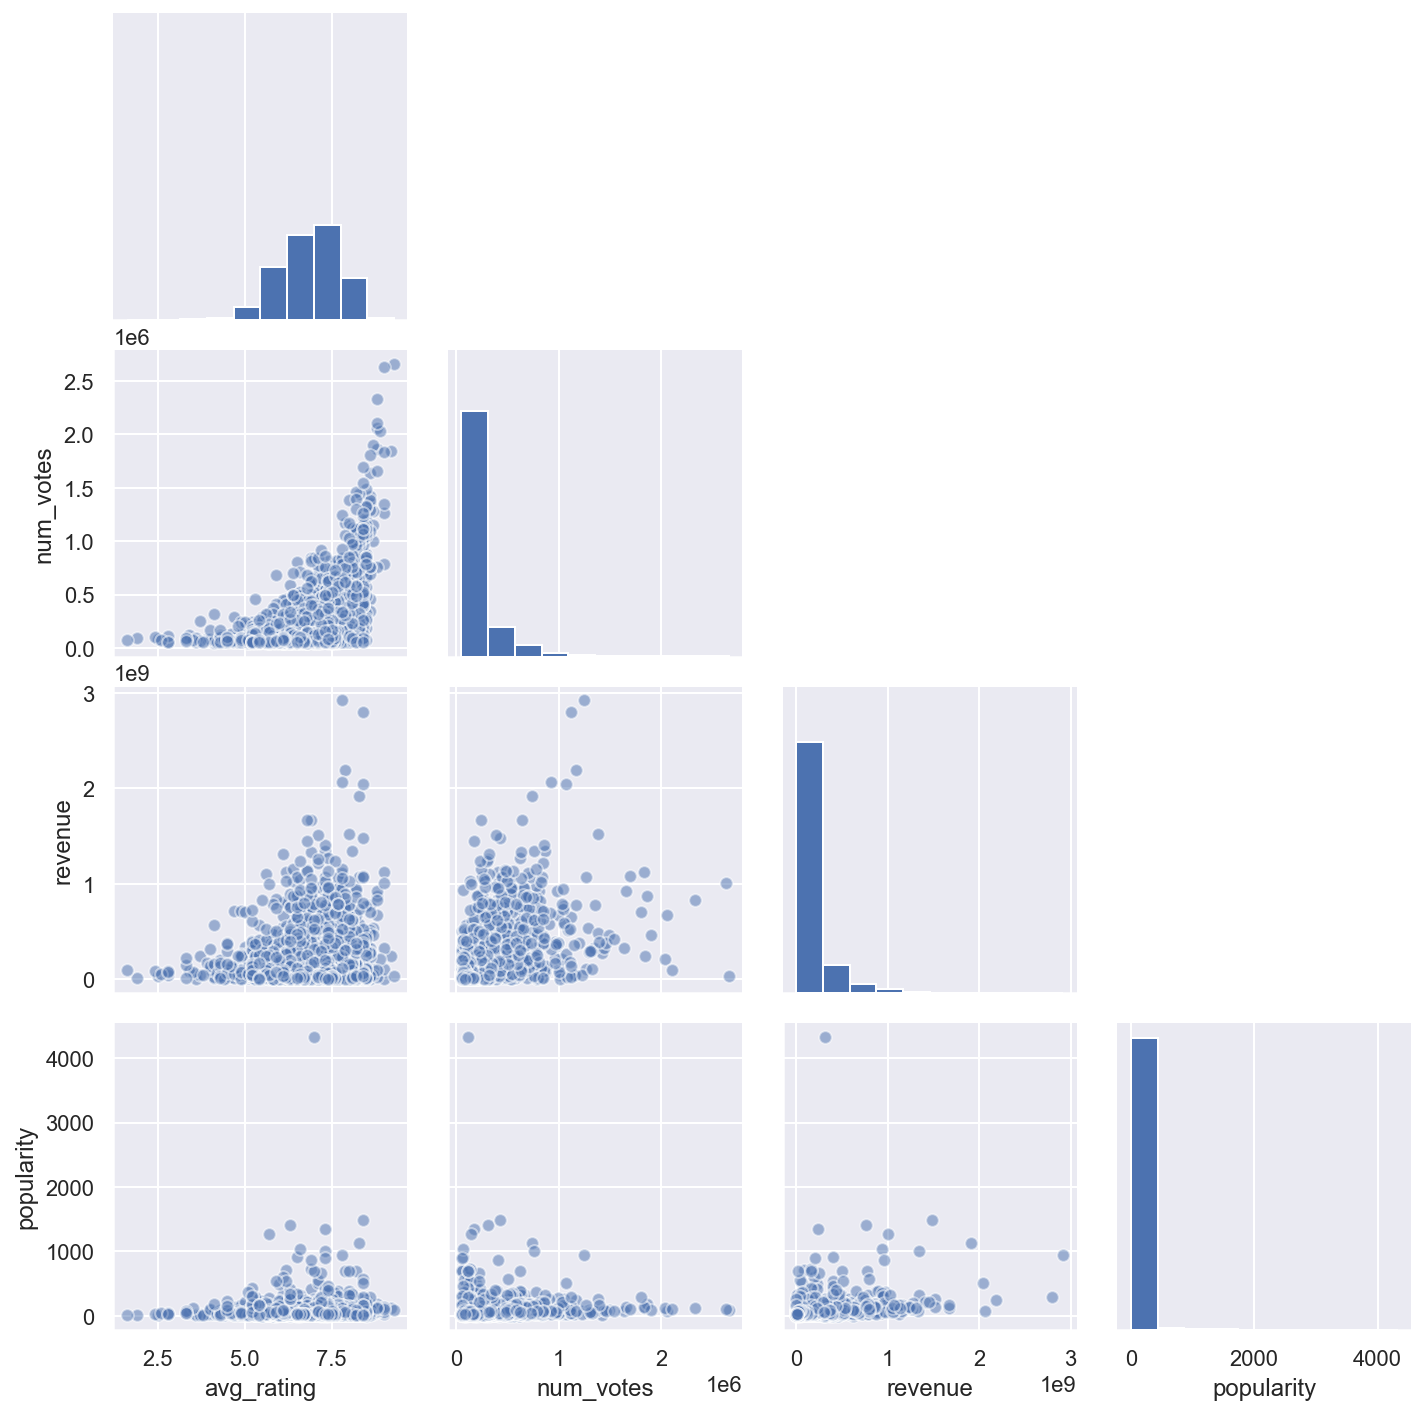

In [18]:
success_meas = ['avg_rating','num_votes', 'revenue', 'popularity'] # Columnas relativas a la valoraci√≥n

graph = sns.PairGrid(df_movies[success_meas], corner = True)
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter,edgecolor='w',s=40, alpha=0.5)
plt.show()

<!--comment -->

La gr√°fica anterior muestra que los valores de algunas variables (`num_votes`, `revenue`, y `popularity`) est√°n muy sesgados, de modo que la mayor√≠a se situan en la parte m√°s baja del rango. A√∫n as√≠, se percibe cierta relaci√≥n entre `avg_rating` y `num_votes`, ya que parece que la gente tiende a votar m√°s las pel√≠culas que le gustan. Tambi√©n se percibe una relaci√≥n similar, aunque menos fuerte, entre `avg_rating` y `revenue`. 



Aunque a priori no parece conveniente eliminar las pel√≠culas con valores altos en `popularity`, los _outliers_  dificultan la visi√≥n tanto del histograma correspondiente como de las gr√°ficas de dispersi√≥n.  Por tanto, se ha de repetir la gr√°fica, pero descartando las pel√≠culas en las que `popularity` toma un valor extremadamente alto. Anteriormente se ha visto que, si bien la popularidad crece de forma pronunciada, la media en el √∫ltimo a√±o se situa ligeramente por encima de 650. Tambi√©n que la diferencia crece de manera dram√°tica a partir del cuantil 0.995. Por tanto, se almacenar√° este valor en la variable `pop_outlier_thresh`, y se utilizar√° como umbral.

In [19]:
pop_outlier_thresh = df_movies['popularity'].quantile(0.995)
pop_outlier_thresh

673.0064899999971

Repetir la gr√°fica elaborada en el ejercicio uno, pero descartando las filas correspondientes a valores de `popularity` mayores que `pop_outlier_thresh` (sin eliminarlos del *DataFrame* `df_movies`).

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El ejercicio es similar al ejercicio anterior, pero hay que hacer una selecci√≥n condicional de las filas cuya popularidad est√° por debajo del umbral `pop_outlier_thresh` y utilizar el *DataFrame* resultante para hacer la gr√°fica.
</details>   





In [20]:
df_graph = df_movies[success_meas]

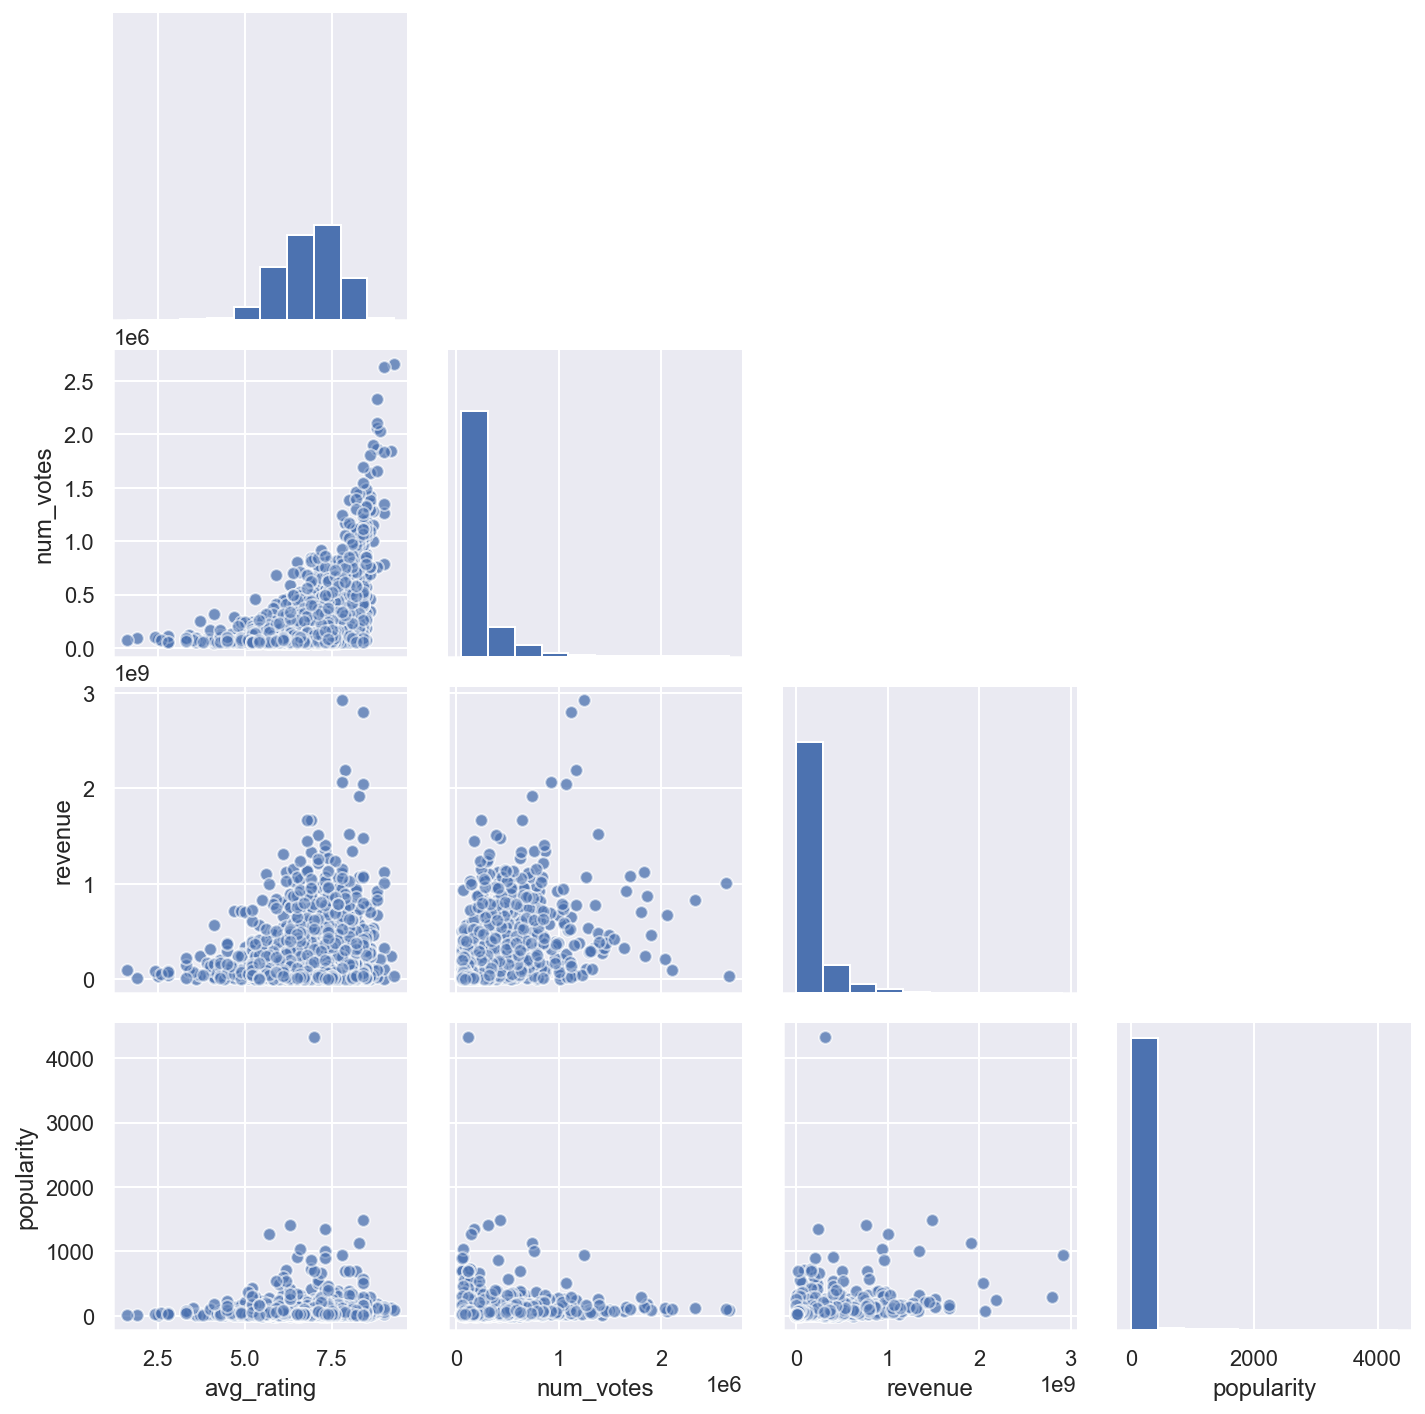

In [21]:
sns.PairGrid(df_graph[df_graph['popularity']<pop_outlier_thresh], corner = True)
graph.map_diag(plt.hist)
graph.map_offdiag(plt.scatter,edgecolor='w',s=40, alpha=0.5)
plt.show()

<!--comment -->

El descarte de los *outliers* permite ver ahora todas las gr√°ficas con claridad. Parece que `num_votes`, y en mayor grado `revenue` guardan una ligera relaci√≥n con `popularity`. Se aprecia que tambi√©n que `avg_rating` se comporta de manera distinta, y que la relaci√≥n con `popularity` es pr√°cticamente nula. En cualquier caso, debido al gran n√∫mero de puntos, y aunque se pueden intuir algunas tendencias, es dif√≠cil establecer hacer una valoraci√≥n clara. En este caso, el coeficiente de correlaci√≥n entre las variables puede ser proporcionar una visi√≥n m√°s precisa. 




Obtener el coeficiente de correlaci√≥n entre los pares de variable. Repetir la operaci√≥n para los datos con y sin _outliers_ (en `popularity`) y comparar.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>

* Se puede utilizar `DataFrame.corr()`.
* Solo hay que seleccionar las columnas de inter√©s (en `success_meas`) y aplicar el m√©todo al *DataFrame* resultante.
</details>   

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> `DataFrame.corr()` devuelve, a su vez, un *DataFrame*. El m√©todo `DataFrame.style.background_gradient()` muestra el conjunto de datos resultante con colores que facilitan su interpretaci√≥n. 
</div>

Muestra la correlaci√≥n incluyendo los *outliers*.

In [22]:
df_graph.corr().style.background_gradient()

<!--comment -->

Muestra la correlaci√≥n descartando los *outliers* en funci√≥n del valor `pop_outlier_thresh`.

In [23]:
df_graph[df_graph['popularity']<pop_outlier_thresh].corr().style.background_gradient()

<!--comment -->

Adem√°s, se considera que el presupuesto de las pel√≠culas (`budget`) podr√≠a tener una incidencia definitiva en su difusi√≥n y, por tanto, en su √©xito. Por ello se va a estudiar su relaci√≥n con algunas de las variables anteriores. 

Obtener la correlaci√≥n de `budget` con las variables `avg_rating`, `num_votes`, `revenue`, y `popularity`. 



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Para hacer este ejercicio, solamente hay que acceder a las 5 columnas de inter√©s y obtener la matriz de correlaci√≥n. En este caso, solamente necesitamos los datos correspondientes a `budget` del resultado, por lo que se puede mostrar la columna correspondiente del *DataFrame*.
</details>   

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> A menos que se indique expl√≠citamente, se trabajar√° con el conjunto de datos completos (sin eliminar _outliers_).
</div>

In [24]:
success_meas.append('budget')
df_graph = df_movies[success_meas]

df_graph.corr().style.background_gradient()

Efectivamente, el presupuesto tiene una correlaci√≥n relativamente alta con los ingresos, a pesar de no tenerla (incluso es ligeramente negativa) con las valoraciones. Esto refleja la importancia de la promoci√≥n. Tambi√©n que las valoraciones tienden a ser m√°s bajas (muy ligeramente) para pel√≠culas de alto presupuesto (¬øel p√∫blico exige m√°s?). 

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<br>
Los datos obtenidos muestran algunos factores de inter√©s:

* Cuando se consideran todas las pel√≠culas, la correlaci√≥n m√°s alta se da entre el n√∫mero de votos (`num_votes`) y los ingresos de la pel√≠cula (`revenue`), lo cual es esperable: cuanta m√°s gente ve una pel√≠cula, m√°s gente tiende a votarla. La correlaci√≥n entre la valoraci√≥n de la pel√≠cula (`avg_rating`) y los ingresos (`revenue`) es nula. Esto hace pensar que la gente va a ver las pel√≠culas por la promoci√≥n y la espectativa que levantan, independientemente de las cr√≠ticas o las valoraciones. 


* Si se eliminan los _outliers_ de `popularity`, la relaci√≥n entre esta variable y las dem√°s cambia ligeramente. En concreto la popularidad ( `popularity`) parece relacionada de manera algo m√°s fuerte con los ingresos (`revenue`). Esto bien podr√≠a deberse a que la popularidad de las novedades es mayor, mientras que la recaudaci√≥n es menor por haber estado menos tiempo en taquilla. Al descartarlas, este fen√≥meno no afecta tanto.


* La valoraci√≥n (`avg_rating`)  tiene cierta relaci√≥n positiva con el n√∫mero de votos (`num_votes`). Parece que la gente tiende a votar para expresar una valoraci√≥n positiva.


* El presupuesto (`budget`) est√° muy relacionado con el beneficio (`revenue`).

Llegado a este punto, y considerando el objetivo inicial del estudio, nos centraremos principalmente en la variable `revenue` para medir la repercusi√≥n de la pel√≠cula (es proporcional a la gente que la ha visto), aunque tambi√©n se estudiar√°n en algunos casos la valoraci√≥n y n√∫mero de votos.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#00586D"> 2. Presupuesto</font>
<br>



<a id="section21"></a>
### <font color="#00586D"> 2.1 Presupuesto / ingresos  </font>
<br>

Los datos anteriores mostraban que la correlaci√≥n entre el presupuesto (`budget`) y los ingresos (`revenue`) es positiva. Es posible estudiar con m√°s en detalle esta relaci√≥n. Un recurso interesante en este sentido es un gr√°fico de tipo `sns.joinplot()`, que dibuja una gr√°fica de dispersi√≥n de las dos variables, la distribuci√≥n marginal de cada una de ellas y,  mediante el par√°metro `kind='reg'` puede a√±adir la recta correspondiente a un modelo de regresi√≥n. 



#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 3</font>



Construir y analizar una gr√°fica `sns.joinplot()` con una recta de regresi√≥n entre las variables `budget` y `revenue`. 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Este tipo de gr√°ficas permite pasar argumentos a la gr√°fica de dispersi√≥n. Cuando `kind='reg'`, `scatter_kws={'s':5, 'alpha':0.2}` har√≠a que se dibujen los puntos con tama√±o 5 y un gran nivel de transparencia, lo que permite apreciar densidades cuando el n√∫mero de puntos es grande.
</details>  

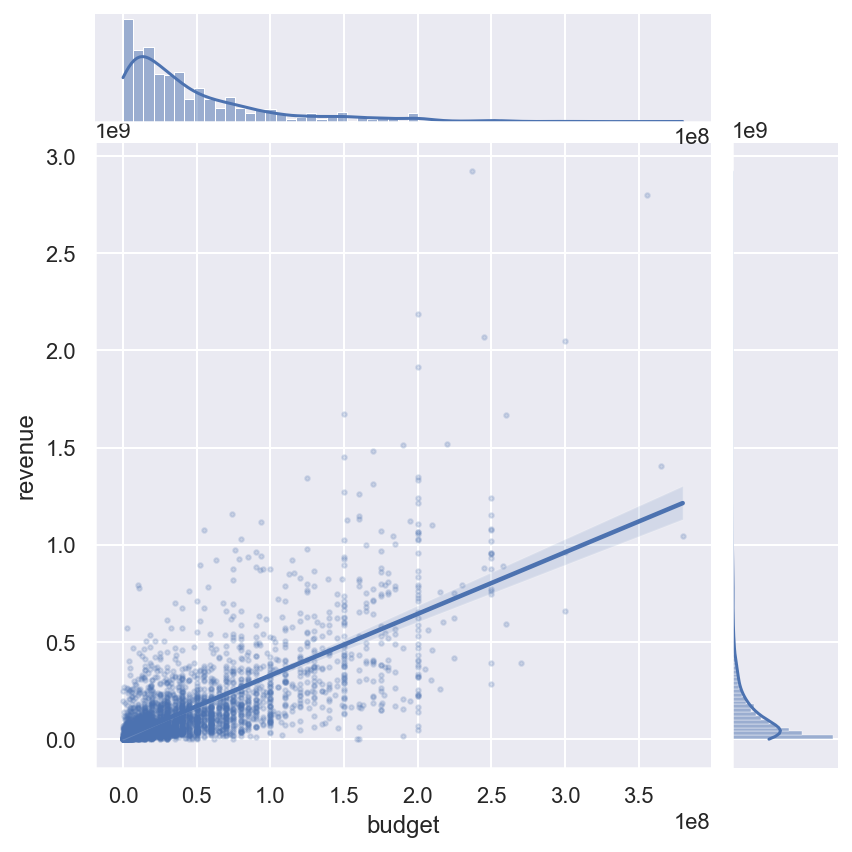

In [25]:
sns.jointplot(data=df_graph,x='budget',y='revenue',kind='reg',scatter_kws={'s':5, 'alpha':0.2})
plt.show()

<!--comment -->

Se aprecia cierta relaci√≥n lineal entre `budget` y `revenue`. Sin embargo, la gr√°fica no permite determinar si esta relaci√≥n es significativa.


Estimar un modelo de regresi√≥n lineal con `statsmodels` y mostrar los resultados. ¬øQu√© valor tiene el $R^2$? ¬øQu√© significa? ¬øSe puede afirmar que existe una relaci√≥n entre el presupuesto y el beneficio? ¬øPor qu√©? 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
*  En las transparencias sobre regresi√≥n lineal (del m√≥dulo III) aparece un ejemplo de regresi√≥n univariada con `statsmodels`.
*  Existen valores perdidos en la columna `budget`. Esto implica que hay que fijar el parametro `missing='drop'` para `sm.OLS`.
* Se han de proporcionar respuestas a las preguntas en la celda correspondiente.
</details>  


In [26]:
df_b_r = df_movies[success_meas]

In [27]:
import statsmodels.api as sm

X = df_b_r['budget']
Y = df_b_r['revenue']

X = sm.add_constant(X)
model = sm.OLS(Y,X,missing = 'drop')

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     3357.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:07:38   Log-Likelihood:                -68539.
No. Observations:                3374   AIC:                         1.371e+05
Df Residuals:                    3372   BIC:                         1.371e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+07   3.78e+06      2.963      0.003    3.79e+06    1.86e+07
budget         3.1668      0.055     57.942      0.000       3.060       3.274
==============================================================================
Omnibus:                     2421.900   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84694.399
Skew:                           2.990   Prob(JB):                         0.00
Kurtosis:                      26.805   Cond. No.                     9.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<!--comment -->

El valor de ùëÖ2 es 0.499, esto sugiere que existe una relaci√≥n entre las variables. Pero solamente con este valor, no podemos determinar cu√°n de significativa es la relaci√≥n. Para ello habr√≠a que fijarse en otras medidas como el p-valor, error est√°ndar o intervalo de confianza, si nos fijamos podemos decir que existe una relaci√≥n significativa entre las variables. 
<br><br><br>

<!--comment -->

Aunque el modelo establece que existe una relaci√≥n lineal, se puede apreciar que est√° condicionada por los valores extremos de  `revenue`. Adem√°s parece que la varianza en esta variable aumenta cuando lo hace `budget`. 



Comprobar esta circunstancia con una gr√°fica de tipo `sns.residplot()`.

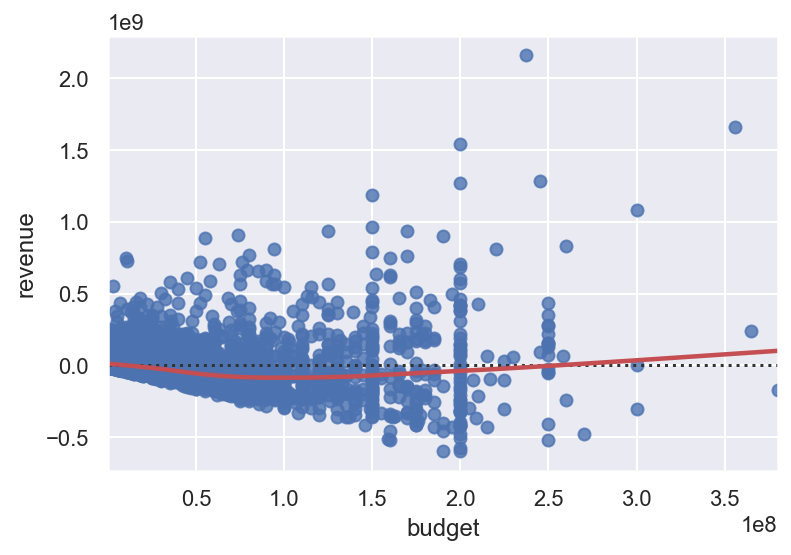

In [28]:
sns.residplot(data=df_b_r, x="budget", y="revenue", lowess=True, line_kws=dict(color="r"))
plt.show()

<!--comment -->

Efectivamente, la varianza de `revenue` aumenta conforme aumenta `budget`, es decir, no se cumple la condici√≥n de homocedasticidad, por lo que los intervalos de confianza y p-valores asociados al modelo de regresi√≥n ***no tienen validez estad√≠stica*** aunque s√≠ permiten intuir la relaci√≥n entre las variables.

Por otra parte, llama la atenci√≥n que existen varios puntos que rompen claramente las tendencias, ya que existen varias pel√≠culas que obtuvieron unos ingresos significativamente por encima de las dem√°s, junto con alg√∫n fracaso que, pese al alto presupuesto, no gener√≥ los ingresos esperados. 

Obtener la informaci√≥n (t√≠tulo, presupuesto y fecha de estreno) relativa a las cinco pel√≠culas con m√°s presupuesto.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Existe un m√©todo que permite obtener *directamente* los *n* mayores elementos dada una columna.
</details> 

In [29]:
df_movies.nlargest(5,'budget')

title  \
movie_id                                                 
tt1298650  Pirates of the Caribbean: On Stranger Tides   
tt2395427                      Avengers: Age of Ultron   
tt4154796                            Avengers: Endgame   
tt0449088     Pirates of the Caribbean: At World's End   
tt0974015                               Justice League   

                             genres  avg_rating  num_votes       budget  \
movie_id                                                                  
tt1298650  Action,Adventure,Fantasy         6.6     528124  380000000.0   
tt2395427   Action,Adventure,Sci-Fi         7.3     859487  365000000.0   
tt4154796    Action,Adventure,Drama         8.4    1116190  356000000.0   
tt0449088  Action,Adventure,Fantasy         7.1     651072  300000000.0   
tt0974015  Action,Adventure,Fantasy         6.1     452353  300000000.0   

              revenue release_date original_language  popularity  \
movie_id                                                           
tt1298650  1045713802   2011-05-14                en     205.013   
tt2395427  1405403694   2015-04-22                en     214.351   
tt4154796  2797800564   2019-04-24                en     298.118   
tt0449088   961000000   2007-05-19                en     164.916   
tt0974015   657926987   2017-11-15                en     126.762   

                                                    keywords  
movie_id                                                      
tt1298650  england,spain,sea,captain,mutiny,sword,prime m...  
tt2395427  artificial intelligence,sequel,superhero,based...  
tt4154796  space travel,time travel,time machine,sequel,s...  
tt0449088  exotic island,east india company,love of one's...  
tt0974015  superhero,based on comic,super power,superhero...

<!--comment -->

Obtener la informaci√≥n (t√≠tulo, ingresos y fecha de estreno) relativa a las diez pel√≠culas con m√°s ingresos.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Existe un m√©todo que permite obtener *directamente* los *n* mayores elementos dada una columna.
</details>  


In [30]:
df_movies.nlargest(5,'revenue')

title  \
movie_id                                                
tt0499549                                      Avatar   
tt4154796                           Avengers: Endgame   
tt0120338                                     Titanic   
tt2488496  Star Wars: Episode VII - The Force Awakens   
tt4154756                      Avengers: Infinity War   

                             genres  avg_rating  num_votes       budget  \
movie_id                                                                  
tt0499549  Action,Adventure,Fantasy         7.8    1243973  237000000.0   
tt4154796    Action,Adventure,Drama         8.4    1116190  356000000.0   
tt0120338             Drama,Romance         7.9    1165985  200000000.0   
tt2488496   Action,Adventure,Sci-Fi         7.8     927896  245000000.0   
tt4154756   Action,Adventure,Sci-Fi         8.4    1069019  300000000.0   

              revenue release_date original_language  popularity  \
movie_id                                                           
tt0499549  2920357254   2009-12-15                en     936.245   
tt4154796  2797800564   2019-04-24                en     298.118   
tt0120338  2187463944   1997-11-18                en     237.839   
tt2488496  2068223624   2015-12-15                en      77.723   
tt4154756  2046239637   2018-04-25                en     505.258   

                                                    keywords  
movie_id                                                      
tt0499549  culture clash,future,space war,space colony,so...  
tt4154796  space travel,time travel,time machine,sequel,s...  
tt0120338  drowning,evacuation,shipwreck,iceberg,forbidde...  
tt2488496                     android,spacecraft,space opera  
tt4154756  magic,sacrifice,superhero,based on comic,space...

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Hay algunas pel√≠culas entre las cinco con mayor presupuesto que no aparecen entre las diez con m√°s ingresos.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section22"></a>
### <font color="#00586D"> 2.2 La fecha de estreno como factor de inter√©s  </font>
<br>

Aunque la correlaci√≥n entre presupuesto y los ingresos corresponde con lo que cabe esperarse (m√°s presupuesto implica tambi√©n m√°s publicidad), hay que considerar que ambos factores dependen fuertemente del a√±o de estreno, ya que se est√°n manejando datos que corresponden a √©pocas distintas. Para tener una idea de la importancia de este factor, es necesario visualizar como evolucionan ambas cantidades a lo largo de los a√±os.




#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 4</font>

Agrupar las pel√≠culas en funci√≥n del a√±o de estreno, y calcular la media de presupuesto e ingresos para cada grupo. Para ello, se utilizar√° la funci√≥n `DataFrame.groupby()`, y se almacenar√° el resultado (la media para `budget` y para `revenue` de cada a√±o) en un *DataFrame* que se denominar√° `df_bud_rev_year`.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Como se ha visto anteriormente, los valores de tipo `TimeStamp` tienen un campo, denominado `year` que contiene el a√±o. 
* Mediante `df_movies['release_date'].dt.year` se puede acceder a la serie de a√±os y utilizarla para hacer la agrupaci√≥n (recordad que a `DataFrame.groupby()` se le puede pasar una *Serie* en lugar de un nombre de columna).  
* Para que el resultado sea correcto, la agrupaci√≥n se ha de hacer sobre `df_movies.dropna()`.
</details>  

In [31]:
df_bud_rev_year = df_movies.groupby(df_movies['release_date'].dt.year)[['budget','revenue']].mean(numeric_only=True).dropna()

In [32]:
df_bud_rev_year.head()

budget    revenue
release_date                      
1920            18000.0     8811.0
1921           250000.0  2500000.0
1925           923000.0  2022550.0
1926           750000.0  1000000.0
1927          1300000.0   650422.0

<!--comment -->

 Dibujar la gr√°fica a partir de la informaci√≥n (dos columnas) que contiene el `DataFrame` `df_bud_rev_year`.
 
 
 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se puede hacer directamente con `sns.lineplot()`
</details>  

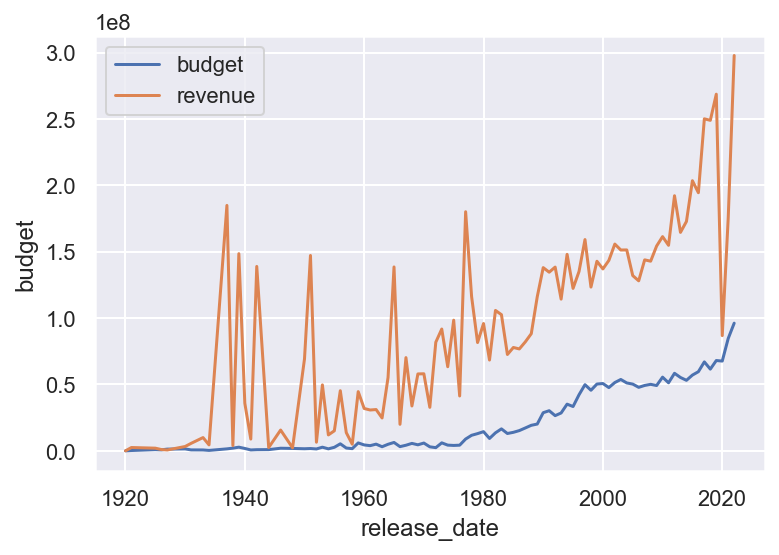

In [33]:
sns.lineplot(data = df_bud_rev_year, y = 'budget', x = df_bud_rev_year.index, label='budget')
sns.lineplot(data = df_bud_rev_year, y = 'revenue', x = df_bud_rev_year.index, label='revenue')
plt.show()

<!--comment -->

En la gr√°fica se pueden visualizar varios fen√≥menos:
* Tanto los presupuestos como los beneficios crecen cada a√±o.
* La l√≠nea de beneficios es m√°s irregular que la de presupuesto.
* Los beneficios parecen crecer m√°s que los presupuestos, sobre todo en los √∫ltimos a√±os.
* Los beneficios cayeron de forma dram√°tica el primer a√±o de la pandemia. 
* Se aprecian seis anomal√≠as importantes anteriores a 1980, en las que se aprecia que los ingresos medios se separan ampliamente de la tendencia. 



Obtener los a√±os a los que corresponden estas entradas. Para ello, pueden obtenerse los 6 mayores valores anteriores a 1980, en el _DataFrame_ `df_bud_rev_year`.

 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El *DataFrame* est√° indexado y ordenado por a√±os, por lo que se puede acceder directamente a las filas de inter√©s.
* Se trata de obtener 6 filas con mayor valor en la columna `revenue`.
</details>  

In [34]:
df_filtered = df_bud_rev_year.loc[df_bud_rev_year.index < 1980]

df_sorted = df_filtered.sort_values(by='revenue')
top_six = df_sorted.tail(6)
top_six

budget       revenue
release_date                         
1965          6325000.0  1.385671e+08
1942           868000.0  1.389548e+08
1951          1748750.0  1.472125e+08
1939          2759000.0  1.485692e+08
1977          8900000.0  1.801678e+08
1937          1488423.0  1.849255e+08

<!--comment -->

En 1937, 1939, 1942, 1951, 1965 y 1977 se producen las alteraciones m√°s importantes de la serie.



Extraer los datos de las pel√≠culas correspondientes a estos a√±os y almacenarlos en un _DataFrame_ denominado `df_anomalies`. Dibujar un gr√°fico de barras horizontal con los ingresos de cada pel√≠cula. Las etiquetas en el eje `y` deben contener el t√≠tulo de la pel√≠culas y, entre par√©ntesis, el a√±o de estreno.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Para hacer este ejercicio, primero hay que crear  `df_anomalies` mediante selecci√≥n condicional con `Series.dt.year` y utilizando el m√©todo `Series.isin()`.
* Para hacer la gr√°fica se puede utilizar el m√©todo `plt.barh()` de *matplotlib*.
* Cuando hay muchas categor√≠as, o los nombres de √©stas son largos, es conveniente que la gr√°fica sea horizontal.
</details>  

In [35]:
df_anomalies = df_movies[df_movies['release_date'].dt.year.isin(top_six.index)]

In [36]:
df_anomalies.head()

title                      genres  \
movie_id                                                                 
tt0029583  Snow White and the Seven Dwarfs  Adventure,Animation,Family   
tt0031381               Gone with the Wind           Drama,Romance,War   
tt0031679     Mr. Smith Goes to Washington                Comedy,Drama   
tt0032138                 The Wizard of Oz    Adventure,Family,Fantasy   
tt0034492                            Bambi   Adventure,Animation,Drama   

           avg_rating  num_votes     budget    revenue release_date  \
movie_id                                                              
tt0029583         7.6     200177  1488423.0  184925486   1937-12-21   
tt0031381         8.2     315675  4000000.0  402352579   1939-12-15   
tt0031679         8.1     116086  1500000.0    9600000   1939-10-19   
tt0032138         8.1     399394  2777000.0   33754967   1939-08-15   
tt0034492         7.3     143873   858000.0  267447150   1942-02-11   

          original_language  popularity  \
movie_id                                  
tt0029583                en     150.919   
tt0031381                en      30.056   
tt0031679                en      14.335   
tt0032138                en     113.698   
tt0034492                en     107.562   

                                                    keywords  
movie_id                                                      
tt0029583  poison,dwarf,witch,becoming an adult,sadness,q...  
tt0031381  southern usa,loss of loved one,based on novel ...  
tt0031679  washington dc, usa,senate,senator,sightseeing,...  
tt0032138  witch,adolescence,based on novel or book,secre...  
tt0034492  loss of loved one,forest,deer,coming of age,be...

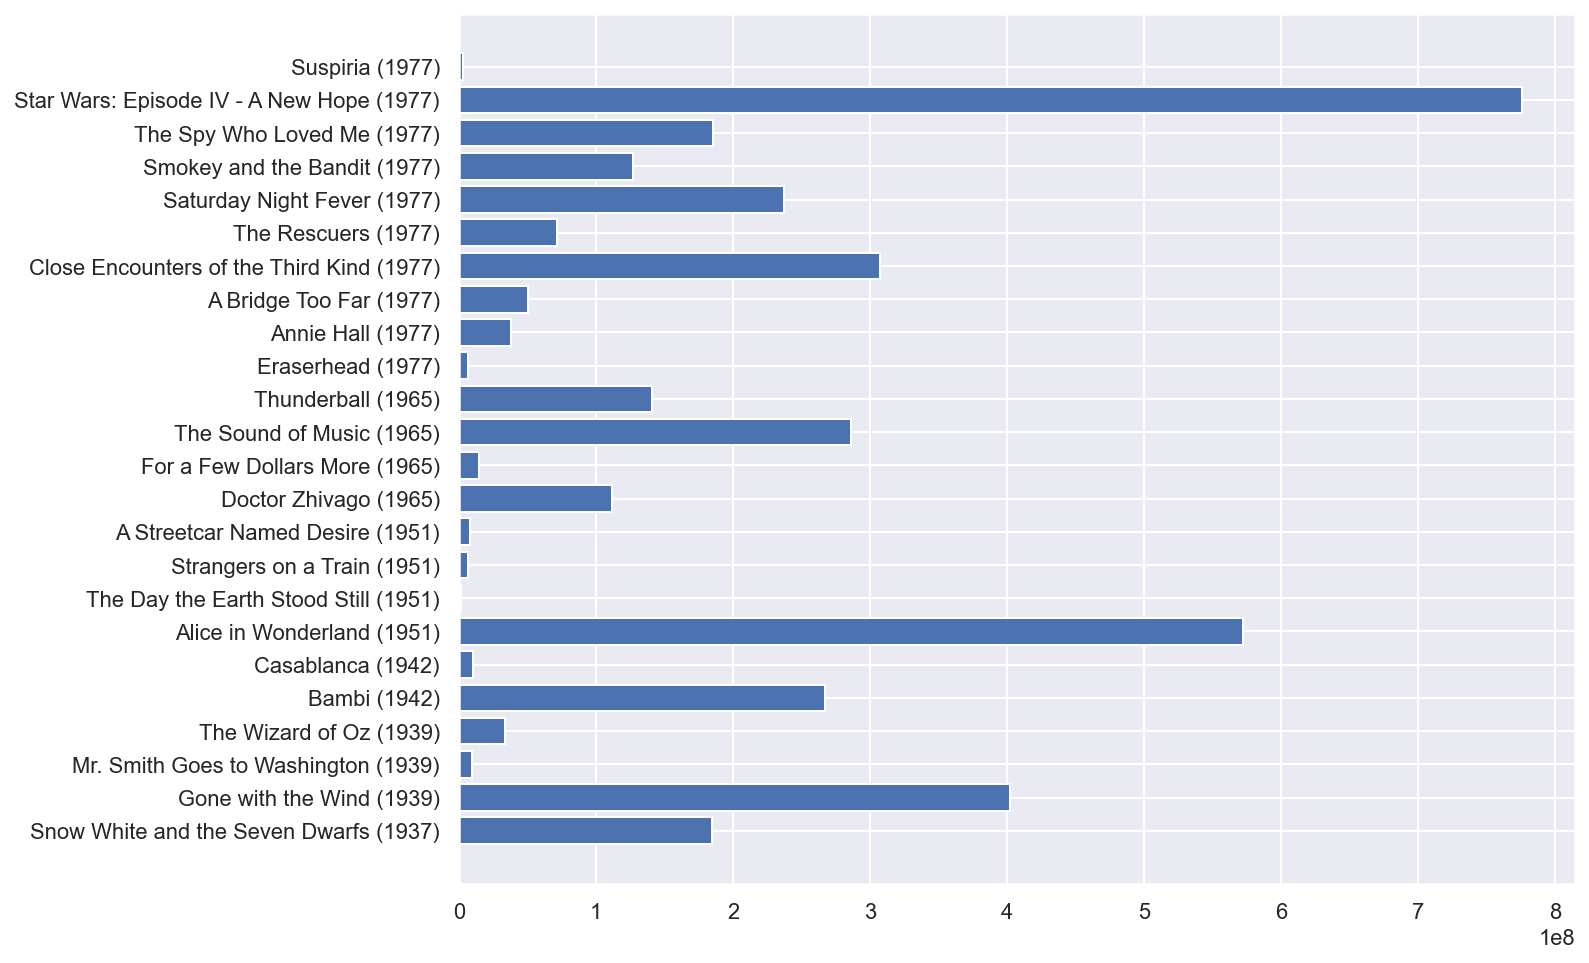

In [37]:
years = df_anomalies['release_date'].dt.year.astype(str)
y = df_anomalies['title']+' '+'('+years+')'
plt.figure(figsize=(10,8))
plt.barh(y,df_anomalies['revenue'])
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Puede apreciarse que estas anomal√≠as se deben a pel√≠culas concretas como "_Gone with the wind_" ("Lo que el viento se llev√≥"), "_Alice in Wonderland_" ("Alicia en el pa√≠s de las maravillas") y, sobre todo, "_Star Wars_". Tambi√©n hay otras como "_Close Encounters with the Third Kind"_ ("Encuentros en la tercera fase"), o algunas otras de animaci√≥n como "Bambi" y "_Snow White and the Seven Dwarfs_" ("Blancanieves y los siete enanitos").

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


### <font color="#00586D"> Conclusi√≥n</font>
<br>

Como resumen hasta ahora puede establecerse que, efectivamente, el presupuesto est√° muy relacionado con los ingresos. Con respecto a la valoraci√≥n, sin embargo, se hab√≠a visto en la secci√≥n anterior que no parece que haya una relaci√≥n relevante, lo que constituye el hallazgo que, a priori, podr√≠a resultar contrario a nuestra intuici√≥n. 

Adem√°s, hay una variable _latente_ que condiciona los ingresos: la fecha de estreno. Para estudiar la repercusi√≥n de otros factores se hace necesario tener en cuenta esta circunstancia. Existen varias posibilidades. 

* Corregir los ingresos y beneficio en funci√≥n del a√±o, eliminando el efecto de la tendencia.
* Estudiar distintos periodos de tiempo por separado. 
* Hacer el estudio para franjas de prespuesto espec√≠ficas. 
* Calcular el porcentaje o ratio de ingresos con respecto al presupuesto. 

Debido esto, y al objetivo del estudio (producci√≥n de una pel√≠cula de presupuesto relativamente bajo), se considerar√°n pel√≠culas m√°s actuales. Adem√°s, desde el a√±o 2000 en adelante se observa que el crecimiento del presupuesto es algo m√°s lento, por lo que se ha decidido centrar el estudio en pel√≠culas estrenadas a partir de esa fecha. Adem√°s, se trabajar√° tambi√©n con el ratio recaudaci√≥n/presupuesto.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Cuando se trabaja con datos temporales, se suele eliminar la tendencia o la estacionalidad. En este proyecto no se trabajar√° a ese nivel, ya que estos conceptos se tratar√°n en el m√≥dulo VII.
</div>

In [38]:
df_movies = df_movies[df_movies['release_date']>='2000']

In [39]:
df_movies.head()

title                      genres  avg_rating  \
movie_id                                                                  
tt0035423        Kate & Leopold      Comedy,Fantasy,Romance         6.4   
tt0118694  In the Mood for Love               Drama,Romance         8.1   
tt0120630           Chicken Run  Adventure,Animation,Comedy         7.1   
tt0120667        Fantastic Four    Action,Adventure,Fantasy         5.7   
tt0120679                 Frida     Biography,Drama,Romance         7.3   

           num_votes       budget    revenue release_date original_language  \
movie_id                                                                      
tt0035423      85214   48000000.0   76019048   2001-12-25                en   
tt0118694     150051     150000.0   12854953   2000-09-29                cn   
tt0120630     193199   45000000.0  224834564   2000-06-21                en   
tt0120667     330945  100000000.0  333535934   2005-06-29                en   
tt0120679      90429   12000000.0   56298474   2002-08-29                en   

           popularity                                           keywords  
movie_id                                                                  
tt0035423      14.495  new york city,love of one's life,duke,time tra...  
tt0118694      24.273  adultery,lovesickness,martial arts,newspaper,h...  
tt0120630      56.776  chicken,northern england,freedom,yorkshire,sto...  
tt0120667      35.381  flying,sibling relationship,fire,marriage prop...  
tt0120679      18.972  painter,mexico,love of one's life,bisexuality,...

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
## <font color="#00586D"> 3. G√©neros</font>
<br>

En la base de datos original, `df_movies`, los g√©neros de cada pel√≠cula aparecen como una lista separada por comas en la columna `genres`. Para poder estudiar la repercusi√≥n de este factor, es necesario llevar a cabo una **transformaci√≥n** que permita operar de manera √°gil. Dado que el n√∫mero de g√©neros es limitado y reducido, es posible utilizar variables identificadoras (_dummy_).  _Otra posibilidad_ consiste en crear un conjunto de datos auxiliar, `df_genres`, en formato _long form_, en el que cada fila corresponda a un par pel√≠cula-g√©nero, y hacer las uniones correspondientes con`df_movies`.  

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> Pod√©is ir ejecutando cada sentencia por separado y ver el resultado para entender mejor el proceso.

In [40]:
# Crea las variables dummy para indicar qu√© g√©nero aparece en cada pel√≠cula.
df_genres = df_movies['genres'].str.get_dummies(',').astype(bool)
df_genres

Action  Adventure  Animation  Biography  Comedy  Crime  \
movie_id                                                            
tt0035423   False      False      False      False    True  False   
tt0118694   False      False      False      False   False  False   
tt0120630   False       True       True      False    True  False   
tt0120667    True       True      False      False   False  False   
tt0120679   False      False      False       True   False  False   
...           ...        ...        ...        ...     ...    ...   
tt9620292   False      False      False      False   False   True   
tt9639470   False      False      False      False   False  False   
tt9731534   False      False      False      False   False  False   
tt9770150   False      False      False      False   False  False   
tt9784798   False      False      False       True   False  False   

           Documentary  Drama  Family  Fantasy  ...  Music  Musical  Mystery  \
movie_id                                        ...                            
tt0035423        False  False   False     True  ...  False    False    False   
tt0118694        False   True   False    False  ...  False    False    False   
tt0120630        False  False   False    False  ...  False    False    False   
tt0120667        False  False   False     True  ...  False    False    False   
tt0120679        False   True   False    False  ...  False    False    False   
...                ...    ...     ...      ...  ...    ...      ...      ...   
tt9620292        False   True   False    False  ...  False    False     True   
tt9639470        False   True   False    False  ...  False    False     True   
tt9731534        False  False   False    False  ...  False    False     True   
tt9770150        False   True   False    False  ...  False    False    False   
tt9784798        False   True   False    False  ...  False    False    False   

            News  Romance  Sci-Fi  Sport  Thriller    War  Western  
movie_id                                                            
tt0035423  False     True   False  False     False  False    False  
tt0118694  False     True   False  False     False  False    False  
tt0120630  False    False   False  False     False  False    False  
tt0120667  False    False   False  False     False  False    False  
tt0120679  False     True   False  False     False  False    False  
...          ...      ...     ...    ...       ...    ...      ...  
tt9620292  False    False   False  False     False  False    False  
tt9639470  False    False   False  False     False  False    False  
tt9731534  False    False   False  False      True  False    False  
tt9770150  False    False   False  False     False  False    False  
tt9784798  False    False   False  False     False  False    False  

[2531 rows x 22 columns]

In [41]:
# Almacena los nombres de los  g√©neros en una lista.
genres = df_genres.columns.to_list()
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [42]:
# Convierte la matriz a formato "long form"
df_genres = (df_genres.reset_index()
                      .melt(id_vars='movie_id', value_vars=genres, var_name='genre', value_name='ind')
                      .set_index('movie_id'))
df_genres

genre    ind
movie_id                 
tt0035423   Action  False
tt0118694   Action  False
tt0120630   Action  False
tt0120667   Action   True
tt0120679   Action  False
...            ...    ...
tt9620292  Western  False
tt9639470  Western  False
tt9731534  Western  False
tt9770150  Western  False
tt9784798  Western  False

[55682 rows x 2 columns]

In [43]:
# Filtra 
df_genres = df_genres[df_genres['ind']==True]
# Borra la columna indicador
del df_genres['ind']
df_genres

genre
movie_id          
tt0120667   Action
tt0120737   Action
tt0120755   Action
tt0120804   Action
tt0120903   Action
...            ...
tt2404435  Western
tt2557490  Western
tt2910904  Western
tt4971344  Western
tt5478478  Western

[6781 rows x 1 columns]

In [44]:
# Muestra las entradas correspondientes a la pel√≠cula "Avatar" (Adventure, Action, Fantasy)
df_genres.loc['tt0499549']

genre
movie_id            
tt0499549     Action
tt0499549  Adventure
tt0499549    Fantasy

Adem√°s, se descartar√°n las columnas de `df_movies` que no se utilizar√°n.

In [45]:
df_movies = df_movies[['title','avg_rating', 'num_votes', 'budget', 'revenue', 'popularity', 'release_date']]

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 5</font>

A partir del *DataFrame* `df_genres`, es posible visualizar con qu√© frecuencia aparecen los g√©neros.  Dibujar un gr√°fico de barras que muestre el n√∫mero de entradas correspondientes a cada valor de `genre` en el *DataFrame* `df_genres`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se puede hacer la gr√°fica directamente con `Seaborn.catplot()`.
* Cuando existen muchas categor√≠as o el nombre es largo, puede convenir que el gr√°fico sea horizontal. Para hacerlo, hay que representar la variable categ√≥rica en el eje *y*.
</details>  

In [46]:
df_genres.head()

genre
movie_id         
tt0120667  Action
tt0120737  Action
tt0120755  Action
tt0120804  Action
tt0120903  Action

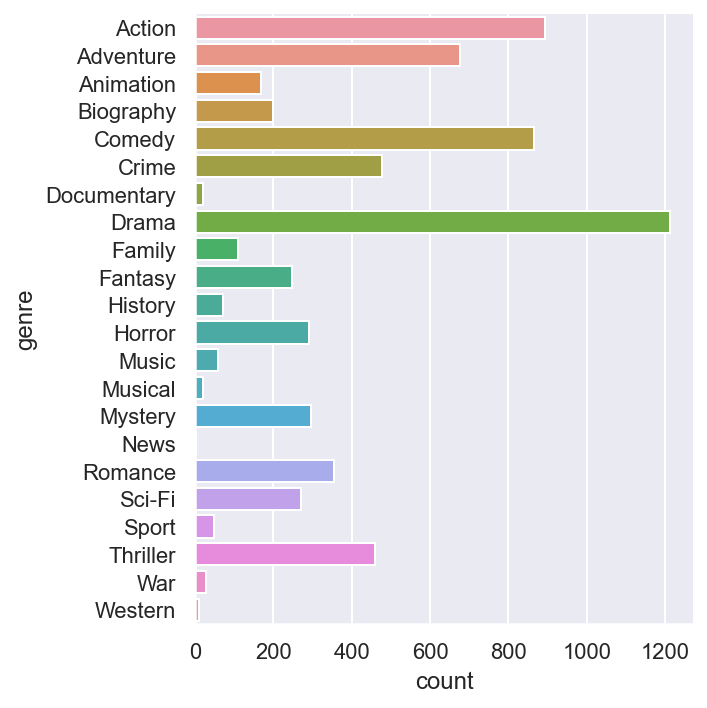

In [47]:
sns.catplot(kind="count", y="genre", data=df_genres)
plt.show()

<!--comment -->

Parece que el drama es, de largo, el g√©nero que tratan m√°s pel√≠culas. Le siguien la acci√≥n y la comedia.



 Mostrar la distribuci√≥n de popularidad por g√©nero con un gr√°fico de cajas (horizontal). Esto requiere utilizar informaci√≥n de `df_genres` (g√©nero) y de `df_movies` (popularidad).
 
 
 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Analizar la informaci√≥n por g√©nero implica fundir el *DataFrame* `df_genres`con `df_movies['popularity']`, preservando todas las entradas de `df_genres`(es necesario fundir por √≠ndice con `on='movie_id'`, y especificar adecuadamente el valor para el par√°metro `how`).
    
* Los outliers de `popularity` hacen que no se vea bien la gr√°fica, por lo que es conveniente hacer selecci√≥n condicional sobre `df_movies` (utilizando `prop_outlier_thresh`) antes de la fusi√≥n. 
    
* El nuevo *DataFrame* se puede visualizar como un gr√°fico de cajas directamente con *Seaborn*.
    
* Por otra parte, para mejorar la visualizaci√≥n se puede jugar con el aspecto (`aspect`), el tama√±o de las l√≠neas `linewidth`, o el tama√±o de los puntos que representan los *outliers* (`fliersize`).
    
* No es necesario hacerlo todo en una llamada (aunque se puede), y se puede crear un *DataFrame* intermedio.
</details>  

In [48]:
df_movies_popu = df_movies['popularity'].loc[df_movies['popularity']<pop_outlier_thresh]
df_movies_popu = df_movies_popu.to_frame(name='popularity')
df_movies_popu.head()

popularity
movie_id             
tt0035423      14.495
tt0118694      24.273
tt0120630      56.776
tt0120667      35.381
tt0120679      18.972

In [49]:
df_genr_mov = pd.merge(df_genres,df_movies_popu,on='movie_id',how='left')
df_genr_mov.head()

genre  popularity
movie_id                     
tt0120667  Action      35.381
tt0120737  Action     174.375
tt0120755  Action      34.975
tt0120804  Action      32.089
tt0120903  Action       3.069

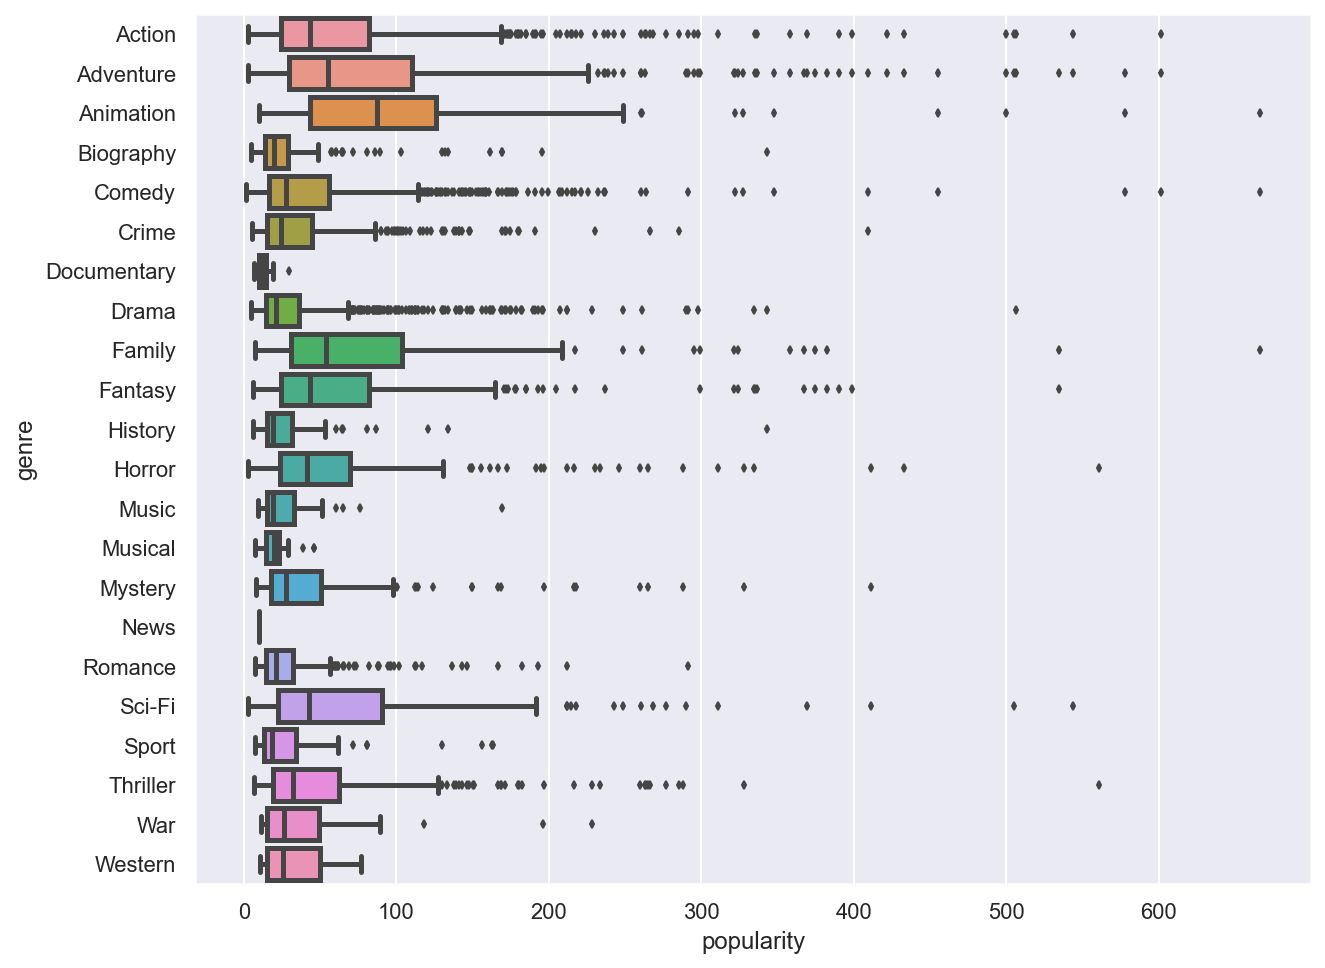

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(x="popularity", y="genre", data=df_genr_mov, linewidth=2.5, fliersize=2.5)
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 6</font>

Para explorar la relaci√≥n entre presupuestos e ingresos en funci√≥n del g√©nero, debido a que las distribuciones est√°n sesgadas, tambi√©n se utilizar√°n gr√°ficas del tipo `sns.boxplot()`. Como paso previo, y para facilitar la exploraci√≥n, se pueden ordenar los g√©neros en funci√≥n de la ___mediana___ de los ingresos obtenidos (`revenue`) por las pel√≠culas correspondientes. Este orden se almacenar√° en la lista `ordered_genres`.

 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El primer paso consiste en fundir `df_genres` con `df_movies['revenue']`.
    
* El *DataFrame* resultante se ha de agrupar seg√∫n la columna `genre`. 
    
* Posteriormente se ha de acceder a la columna `'revenue'` de la agrupaci√≥n, y devolver la mediana. 
    
* La serie resultante se puede ordenar y posteriormente se puede devolver el √≠ndice de la misma (que preserva el orden).
    
* No es necesario hacerlo todo en una llamada (aunque se puede)
</details> 

In [51]:
ordered_genres = (
                    pd.merge(df_genres,df_movies['revenue'],on='movie_id',how='left')
                      .groupby('genre')['revenue'].mean()
                      .sort_values(ascending=False)
)
print(ordered_genres)

genre
Animation      3.846900e+08
Adventure      3.581661e+08
Family         3.152812e+08
Sci-Fi         2.896956e+08
Fantasy        2.649715e+08
Action         2.470563e+08
Musical        1.710402e+08
Comedy         1.625340e+08
Thriller       1.329165e+08
Western        1.287991e+08
Music          1.050624e+08
History        1.046296e+08
Drama          1.036777e+08
Crime          1.024464e+08
Romance        1.013973e+08
Mystery        9.663963e+07
Biography      9.278454e+07
War            9.198790e+07
Horror         9.131649e+07
Sport          7.587186e+07
News           4.624300e+07
Documentary    4.557328e+07
Name: revenue, dtype: float64


<!--comment -->

 Dibujar un gr√°fico de cajas y bigotes con el beneficio por g√©nero, utilizando el orden entre g√©neros almacenado en `ordered_genres`.
 
  <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El primer paso consiste en fundir `df_genres` con `df_movies['revenue']`.
    
* Se puede hacer la gr√°fica directamente con `Seaborn.catplot()` a partir del *DataFrame* resultante.
    
* Para pasar el orden de las cajas puede utilizarse el par√°metro `order=ordered_genres`.
    
* Por otra parte, pueden cambiarse los colores de la gr√°fica, por ejemplo, con `palette="flare"`, que es una paleta secuencial.
    
* Tambi√©n se deben rotar las etiquetas del eje *x* con `plt.xticks()`.
    
* No es necesario hacerlo todo en una llamada (aunque se puede)
</details> 

In [52]:
df_gen_rev = pd.merge(df_genres,df_movies['revenue'],on='movie_id',how='left')

In [53]:
df_gen_rev.head()

genre    revenue
movie_id                    
tt0120667  Action  333535934
tt0120737  Action  871368364
tt0120755  Action  546388105
tt0120804  Action  102984862
tt0120903  Action  296339527

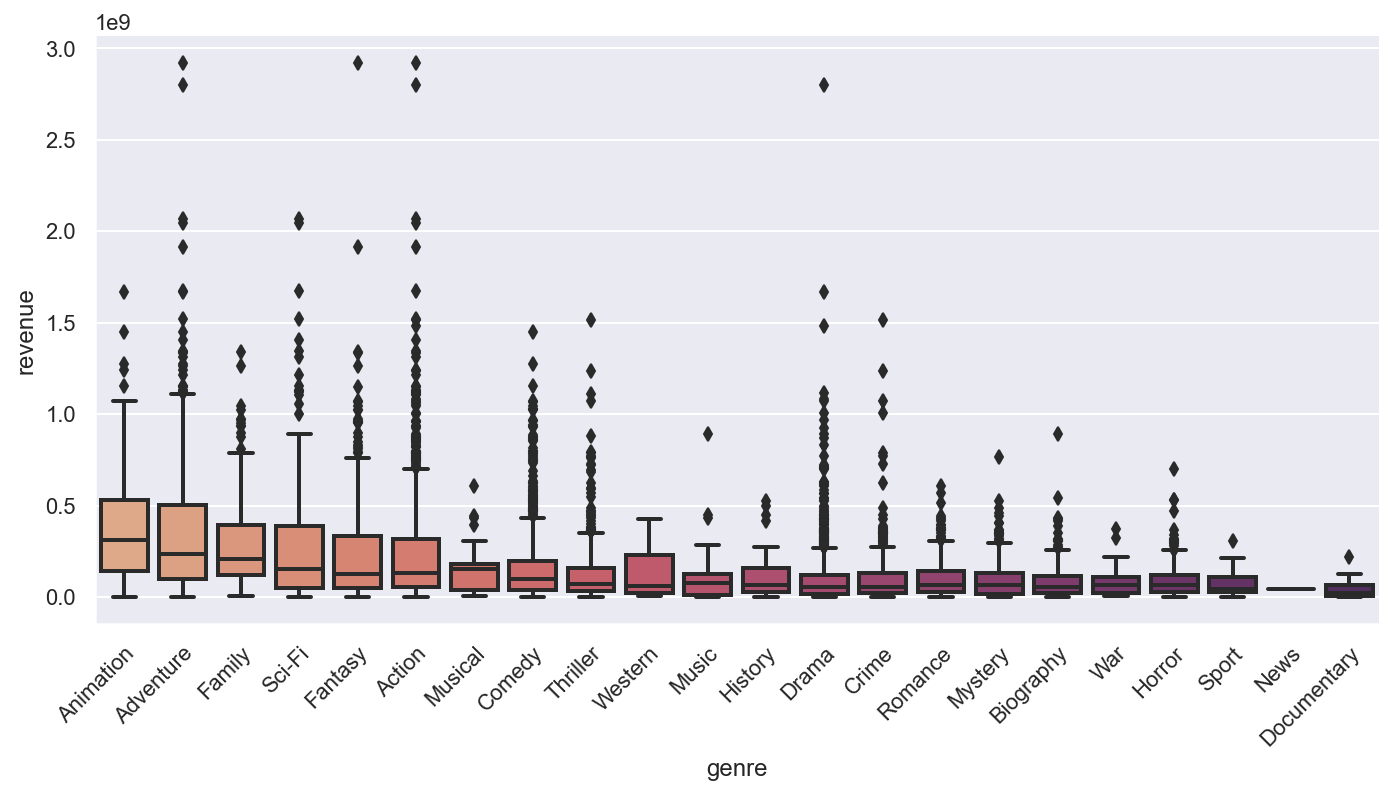

In [54]:
sns.catplot(x="genre", y="revenue", data=df_gen_rev, kind='box',order=ordered_genres.index, palette="flare",height = 5, aspect=2, linewidth=2)
plt.xticks(rotation=45, ha='right' ,rotation_mode='anchor')
plt.show()

<!--comment -->

Puede apreciarse que las pel√≠culas de animaci√≥n, aventuras, familia y ciencia ficci√≥n, son los g√©neros que m√°s recaudan. Los que menos, las noticias, los deportes y los documentales. Es curioso, aunque puede estar relacionado, que el drama es el g√©nero m√°s frecuente y es uno de los que menos recauda.
<br>




Anteriormente se comprob√≥ la importancia del presupuesto en la recaudaci√≥n. Por tanto, es interesante tambi√©n estudiar si la relaci√≥n de las recaudaciones por g√©nero se refleja tambi√©n en los presupuestos.   Elaborar una gr√°fica similar a la anterior en la que se muestre el presupuesto por g√©neros. Para comparar, puede ser de utilidad mantener el mismo orden en la representaci√≥n utilizado anteriormente (la mediana de los ingresos).


  <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Es ***id√©ntico*** al anterior. Solo hay que utilizar la columna `revenue` por `budget` en la gr√°fica.
    
* En este caso, el uso de la paleta `flare` puede distorsionar la percepci√≥n de la grafica ya que hace percibir m√°s orden del que realmente hay. Utilizar un color solamente. Por ejemplo, un tono de gris claro con `color='.95'`.
</details> 

In [55]:
df_gen_bud = pd.merge(df_genres,df_movies['budget'],on='movie_id',how='left')

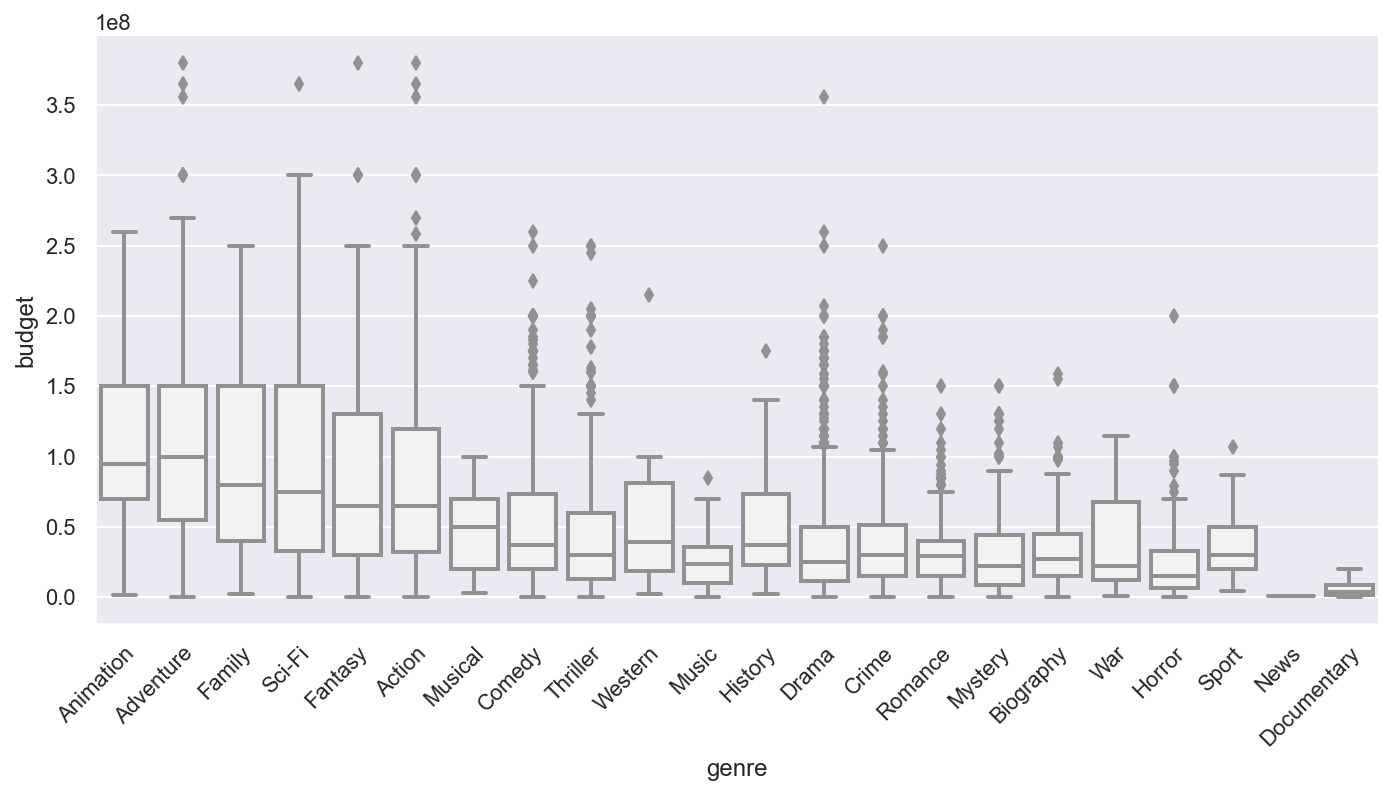

In [56]:
sns.catplot(x="genre", y="budget", data=df_gen_bud, kind='box',order=ordered_genres.index,color='.95' ,height = 5, aspect=2, linewidth=2)
plt.xticks(rotation=45, ha='right' ,rotation_mode='anchor')
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Se aprecian algunos cambios menores.  No obstante, la tendencia general, es que los g√©neros que producen m√°s ingresos son tambi√©n los que m√°s presupuesto reciben. 

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section4"></a>
## <font color="#00586D"> 4. Personas</font>
<br>

Una vez estudiados los g√©neros, va a estudiarse si el director y el reparto tienen relaci√≥n con la rentabilidad de las pel√≠culas. El _DataFrame_ `df_credits` contiene la relaci√≥n de personas que participan en cada pel√≠cula y en calidad de qu√©. Por otra parte, el _DataFrame_ `df_people` contiene la informaci√≥n relativa a cada persona, incluyendo su nombre.







<a id="section41"></a>
### <font color="#00586D"> 4.1 Directores</font>
<br>

Interesa obtener informaci√≥n sobre los ingresos que producen los directores,  sobre su popularidad y la relaci√≥n de ambos factores.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 7</font> 


Elaborar una gr√°fica `sns.jointplot()` para comprobar si existe correlaci√≥n entre los ingresos de las pel√≠culas y la popularidad de su director. Esto implica utilizar datos de `df_credits`, de `df_people[popularity]` y de `df_movies['revenue']`) por lo que hay que hacer dos fusiones. El resultado de estas se debe almacenar en un *DataFrame* denominado `df_dir_pop_rev`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* En primer lugar, hay que hacer selecci√≥n condicional sobre `df_credits`, de modo que se seleccionen las filas en las que `rol` sea `director`.
* El resultado se ha de fundir con `df_people['popularity']` utilizando `people_id` como clave de uni√≥n.
* El resultado se ha de fundir a su vez con `df_movies['revenue']` utilizando `movie_id` como clave de uni√≥n.
* En los dos casos hay que ser consciente de c√≥mo (`how`) se hace la uni√≥n. Se ha de tener en cuenta que muchas pel√≠culas en `df_credits` no est√°n en `df_movie`. Esto puede (seg√∫n se haga la uni√≥n) generar *NaN* que hay que eliminar.
* La gr√°fica se puede mostrar directamente. Conviene utilizar transparencia para poder apreciar densidades.
</details>  


In [57]:
df_credits.head()

people_id   movie_id       rol
0       2991  tt0010323  director
1      13848  tt0012349  director
2       9076  tt0013442  director
3       8635  tt0015324  director
4       9603  tt0015648  director

In [58]:
df_credits_dir = df_credits.query('rol == "director"')

In [59]:
df_dir_pop = pd.merge(df_credits_dir,df_people['popularity'],on='people_id',how='left')

In [60]:
df_dir_pop_rev = pd.merge(df_dir_pop,df_movies['revenue'],on='movie_id',how='right')

In [61]:
df_dir_pop_rev.head()

people_id   movie_id       rol  popularity    revenue
0        366  tt0035423  director       8.683   76019048
1      12453  tt0118694  director       8.558   12854953
2       7314  tt0120630  director       2.107  224834564
3      53304  tt0120630  director       1.459  224834564
4      20400  tt0120667  director       2.118  333535934

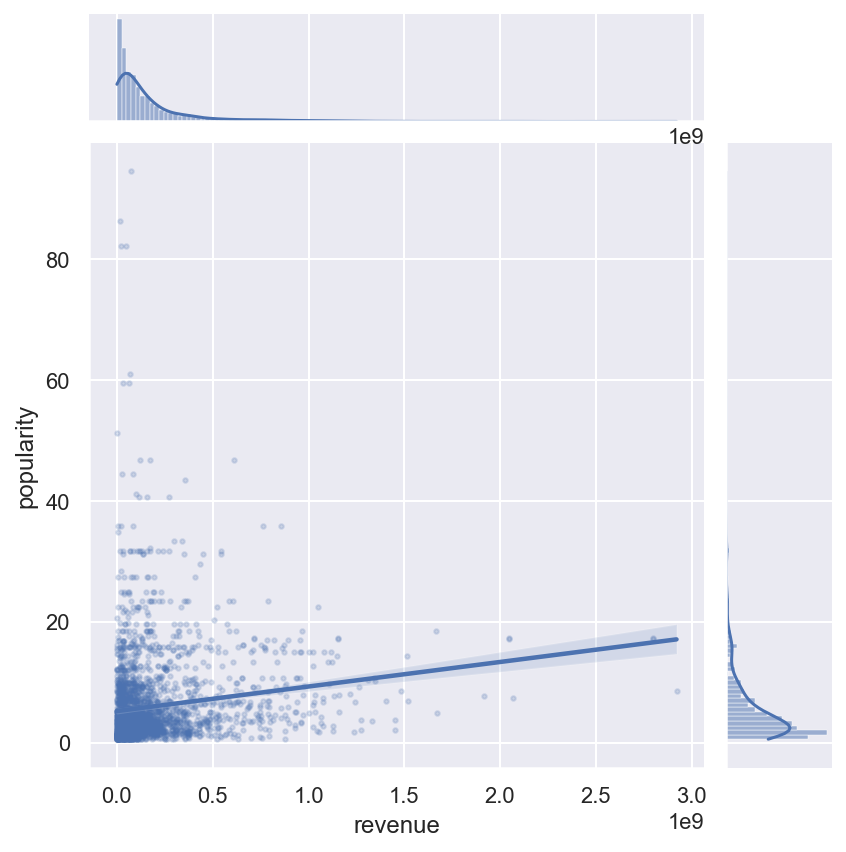

In [62]:
sns.jointplot(data=df_dir_pop_rev,x='revenue',y='popularity',kind='reg',scatter_kws={'s':5, 'alpha':0.2})
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Puede apreciarse que la relaci√≥n entre popularidad del director y el beneficio es casi nula.

In [63]:
df_dir_pop_rev[['popularity','revenue']].corr()

popularity  revenue
popularity      1.0000   0.1455
revenue         0.1455   1.0000

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section42"></a>
### <font color="#00586D"> 4.2 Reparto</font>
<br>


Una vez estudiado el papel del director, se proceder√° de igual manera con el reparto. 

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 8</font> 

Elaborar una gr√°fica `sns.jointplot()` para comprobar si existe correlaci√≥n entre los ingresos de las pel√≠culas y la popularidad de su reparto. El resultado de estas se debe almacenar en un *DataFrame* denominado `df_cast_pop_rev`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El ejercicio es similar al anterior. Solo hay que cambiar el rol a `cast` y nombrar el *DataFrame* resultante `df_cast_pop_rev`. 

</details>  


In [64]:
df_credits_cast = df_credits.query('rol == "cast"')

In [65]:
df_cast_pop = pd.merge(df_credits_cast,df_people['popularity'],on='people_id',how='left')

In [66]:
df_cast_pop_rev = pd.merge(df_cast_pop,df_movies['revenue'],on='movie_id',how='right')

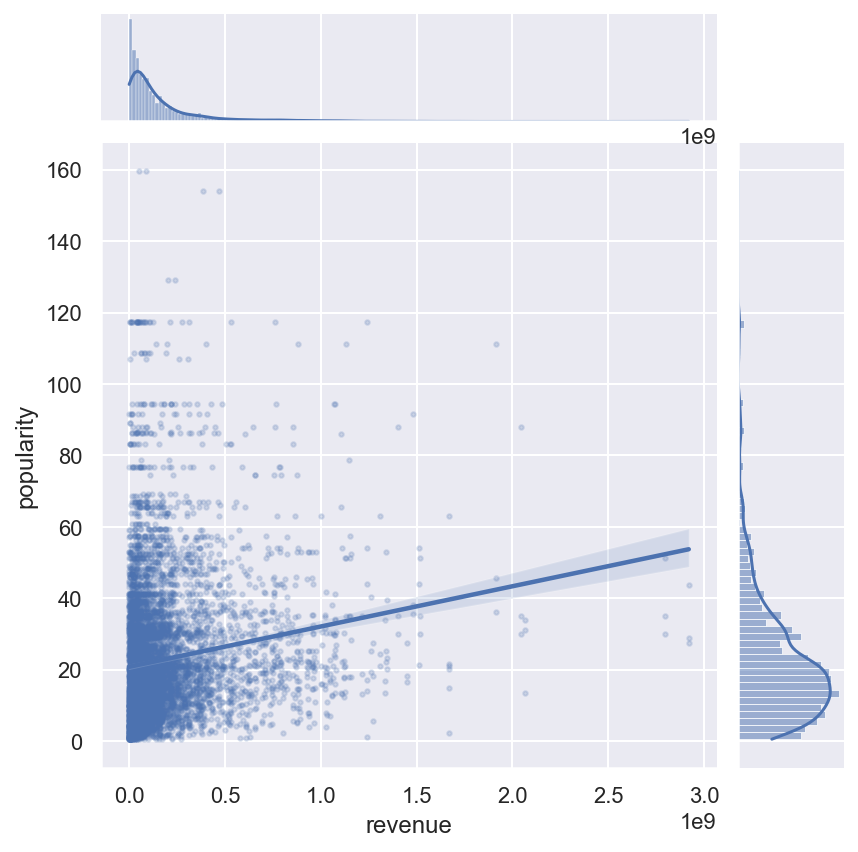

In [67]:
sns.jointplot(data=df_cast_pop_rev,x='revenue',y='popularity',kind='reg',scatter_kws={'s':5, 'alpha':0.2})
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

In [68]:
df_cast_pop_rev[['popularity','revenue']].corr()

popularity   revenue
popularity    1.000000  0.151211
revenue       0.151211  1.000000

Se aprecia tambi√©n que, aunque influye positivamente, no es determinante porque casi es nula.


En definitiva, y seg√∫n se aprecia en las gr√°ficas, el principal factor en relaci√≥n a la recaudaci√≥n es el presupesto, mientras que otros como el director o los actores sean irrelevantes (salvo en casos muy espec√≠ficos, se intuye).


Aunque podr√≠a profundizarse en el an√°lisis, esto se har√° posteriormente teniendo en cuenta el objetivo con el que se plantea la exploraci√≥n.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section5"></a>
## <font color="#00586D"> 5. Pel√≠culas de bajo presupuesto</font>
<br>

En el objetivo de estudio que se ha establecido inicialmente, se parte de la base de que se dispone de un presupuesto limitado, por lo que se va a estudiar tambi√©n la relaci√≥n entre g√©nero e ingresos en este supuesto, considerando solamente aquellas pel√≠culas cuyo presupuesto se encuentra en el 20% m√°s bajo.

A continuaci√≥n se almacenan las pel√≠culas en las que se centrar√° el estudio (posteriores al a√±o 2000 y de bajo presupuesto) en `df_movies_low`.

In [69]:
low_budget = df_movies['budget'].quantile(0.20)
df_movies_low = df_movies[df_movies['budget']<low_budget]
len(df_movies_low)

472

Aunque es algo que se puede gestionar "sobre la marcha", retener solamente las pel√≠culas de inter√©s en `df_genres` facilita las cosas. En este caso se seleccionan y se almacenan en `df_genres_low`.

In [70]:
df_genres_low = df_genres.loc[df_movies_low.index]

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 9</font> 

Recalcular el orden de los g√©neros en funci√≥n de la mediana los ingresos y construir una gr√°fica de cajas con los datos almacenados en el *DataFrame* `df_movies_low`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se trata de repetir el primer apartado del ejercicio 6, pero con `df_genres_low` y `df_movies_low`.

</details>  


In [71]:
ordered_genres = (
                    pd.merge(df_genres_low,df_movies_low['revenue'],on='movie_id',how='left')
                      .groupby('genre')['revenue'].mean()
                      .sort_values(ascending=False)
)
print(ordered_genres)

genre
Family         9.562335e+07
Horror         6.295876e+07
Mystery        6.116074e+07
Documentary    5.859712e+07
Thriller       5.168126e+07
Musical        4.846344e+07
Biography      4.812328e+07
News           4.624300e+07
War            4.582627e+07
Romance        4.476590e+07
Comedy         4.006262e+07
Action         3.706421e+07
History        3.545504e+07
Drama          3.508859e+07
Adventure      3.493709e+07
Crime          3.184034e+07
Sci-Fi         3.131324e+07
Music          3.057390e+07
Sport          2.708269e+07
Fantasy        2.406130e+07
Animation      1.940766e+07
Western        1.698466e+07
Name: revenue, dtype: float64


In [72]:
df_movies_low.head()

title  avg_rating  num_votes  \
movie_id                                                              
tt0118694               In the Mood for Love         8.1     150051   
tt0120679                              Frida         7.3      90429   
tt0144084                    American Psycho         7.6     611514   
tt0168629                 Dancer in the Dark         7.9     110541   
tt0169102  Lagaan: Once Upon a Time in India         8.1     114818   

               budget   revenue  popularity release_date  
movie_id                                                  
tt0118694    150000.0  12854953      24.273   2000-09-29  
tt0120679  12000000.0  56298474      18.972   2002-08-29  
tt0144084   7000000.0  34266564      85.933   2000-04-13  
tt0168629  12800000.0  40031879      14.249   2000-06-30  
tt0169102   5200000.0   8100000       7.497   2001-06-15

In [73]:
df_mov_gen_low = pd.merge(df_genres_low,df_movies_low['revenue'],on='movie_id',how='left')

<!--comment -->

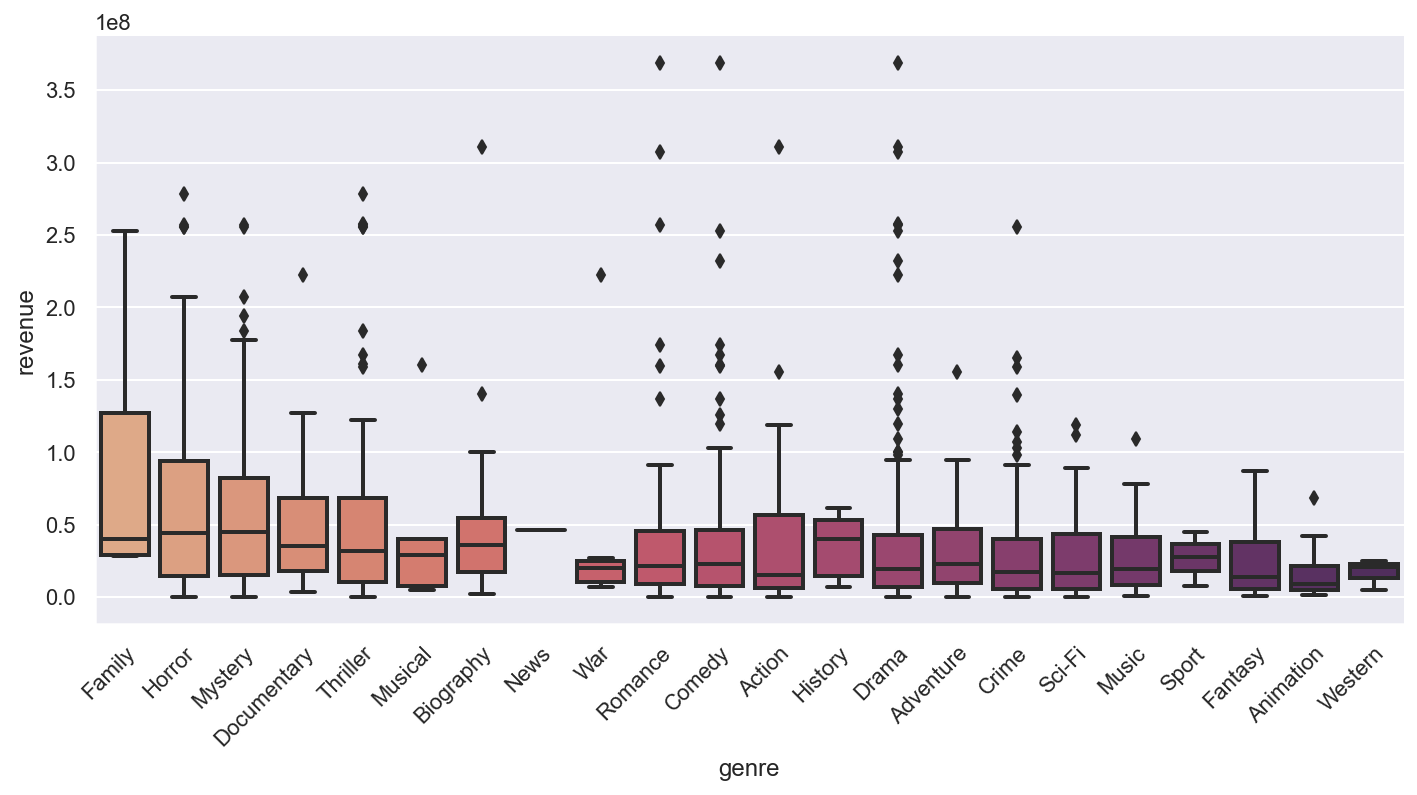

In [74]:
sns.catplot(x="genre", y="revenue", data=df_mov_gen_low, kind='box',order=ordered_genres.index, palette="flare",height = 5, aspect=2, linewidth=2)
plt.xticks(rotation=45, ha='right' ,rotation_mode='anchor')
plt.show()


<!--comment -->

Puede apreciarse un cambio claro de tendencia. Cuando los prespuestos son relativamente bajos, g√©neros como el misterio y el terror pasan a ser m√°s rentables.  Tambi√©n alg√∫n otro g√©nero como las noticias o historia. Llama tambi√©n la atenci√≥n que, g√©neros como la animaci√≥n o fantas√≠a, que son los m√°s rentables en el caso general, no son rentables cuando los presupuestos son bajos.
<br>

Como los g√©neros m√°s rentables son el terror, y el misterio (si se descartan las noticias, que solo hay una pel√≠cula), se seleccionar√°n las pel√≠culas correspondientes a estos, adem√°s del _thriller_ (esta √∫ltima por estar relacionada y mostrar tambi√©n algunos valores altos) para estudiarlas en m√°s profundidad. 



 Eliminar de `df_movies_low` las pel√≠culas que no correspondan a los g√©neros `Horror`, `Thriller` o `Mystery`.
 
 
 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* En realidad se trata de seleccionar las filas de inter√©s y guardar el resultado en `df_movies_low`.
* Se trata de hacer selecci√≥n condicional con `Series.isin()` sobre `df_genres_low`. El resultado contiene los √≠ndices de las pel√≠culas de inter√©s. 
* Los *valores √∫nicos* de este √≠ndice se pueden utilizar para acceder a las filas de `df_movies_low`.

</details>  


In [75]:
df_movies_low = df_movies_low.loc[df_genres_low[df_genres_low['genre'].isin(['Horror','Thriller','Mystery'])].index.unique()]
df_movies_low = df_movies_low.drop_duplicates()
df_movies_low.head()

title  avg_rating  num_votes      budget   revenue  \
movie_id                                                                  
tt0144084  American Psycho         7.6     611514   7000000.0  34266564   
tt0181984      Boiler Room         7.0      53663   7000000.0  28780255   
tt0209144          Memento         8.4    1232381   9000000.0  39723096   
tt0211443          Jason X         4.4      57313  11000000.0  16951798   
tt0219699         The Gift         6.7      69992  10000000.0  12008642   

           popularity release_date  
movie_id                            
tt0144084      85.933   2000-04-13  
tt0181984      17.792   2000-02-18  
tt0209144      32.570   2000-10-11  
tt0211443      47.684   2001-11-09  
tt0219699      31.863   2000-03-16

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Una vez reducido el conjunto de pel√≠culas a las que resultan de inter√©s para el contexto planteado, se obtendr√°n la lista de directores y actores ligados a una mayor recaudaci√≥n. 

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 10</font> 

Crear un *DataFrame* denominado `best_directors_low` con los datos (`people_id`, `revenue`, `name`, `popularity` y `gender`) de los diez directores para los que la recaudaci√≥n media de sus pel√≠culas es mayor.


 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Este ejercicio implica obtener datos de los tres *DataFrame* 
* Hay que filtrar los cr√©ditos correspondientes a director
* El resultado se ha de fundir con `df_movies_low['revenue']` 
* El *DataFrame* resultante se ha de agrupar en funci√≥n del `people_id` y obtener el valor medio de `revenue` 
* Se pueden obtener directamente las diez filas o elementos con mayor valor de `revenue`, y fundir el resultado con `df_people` para disponer tambi√©n de los nombres y otros datos.
</details>  

In [76]:
df_dir_mov_low = pd.merge(df_credits_dir,df_movies_low['revenue'],on='movie_id',how='right')

In [77]:
df_dir_mov_low = df_dir_mov_low.groupby('people_id')['revenue'].mean()

In [78]:
df_dir_mov_low = df_dir_mov_low.nlargest(10)

In [79]:
df_dir_mov_low = df_dir_mov_low.to_frame('revenue')

In [80]:
best_directors_low = pd.merge(df_people,df_dir_mov_low,on='people_id',how='right')
best_directors_low = best_directors_low[['revenue','name','popularity','gender']]

best_directors_low

revenue                name  popularity  gender
people_id                                                     
26714      257047661.0    John R. Leonetti       3.716       2
64141      255614941.0  David Gordon Green      12.051       2
291263     255407969.0        Jordan Peele      12.006       2
90591      194183034.0           Oren Peli       1.177       2
11614      188452210.0  M. Night Shyamalan      12.368       2
20310      183474602.0     Takashi Shimizu       3.617       2
20133      177512032.0        Tod Williams       1.658       2
142272     174928918.0         Henry Joost       1.522       2
142276     174928918.0      Ariel Schulman       3.156       2
1306608    161448094.5        Adam Robitel       3.209       2

<!--comment -->

Crear una gr√°fica de barras (horizontal) con los valores `revenue` para cada director en `best_directors_low`.

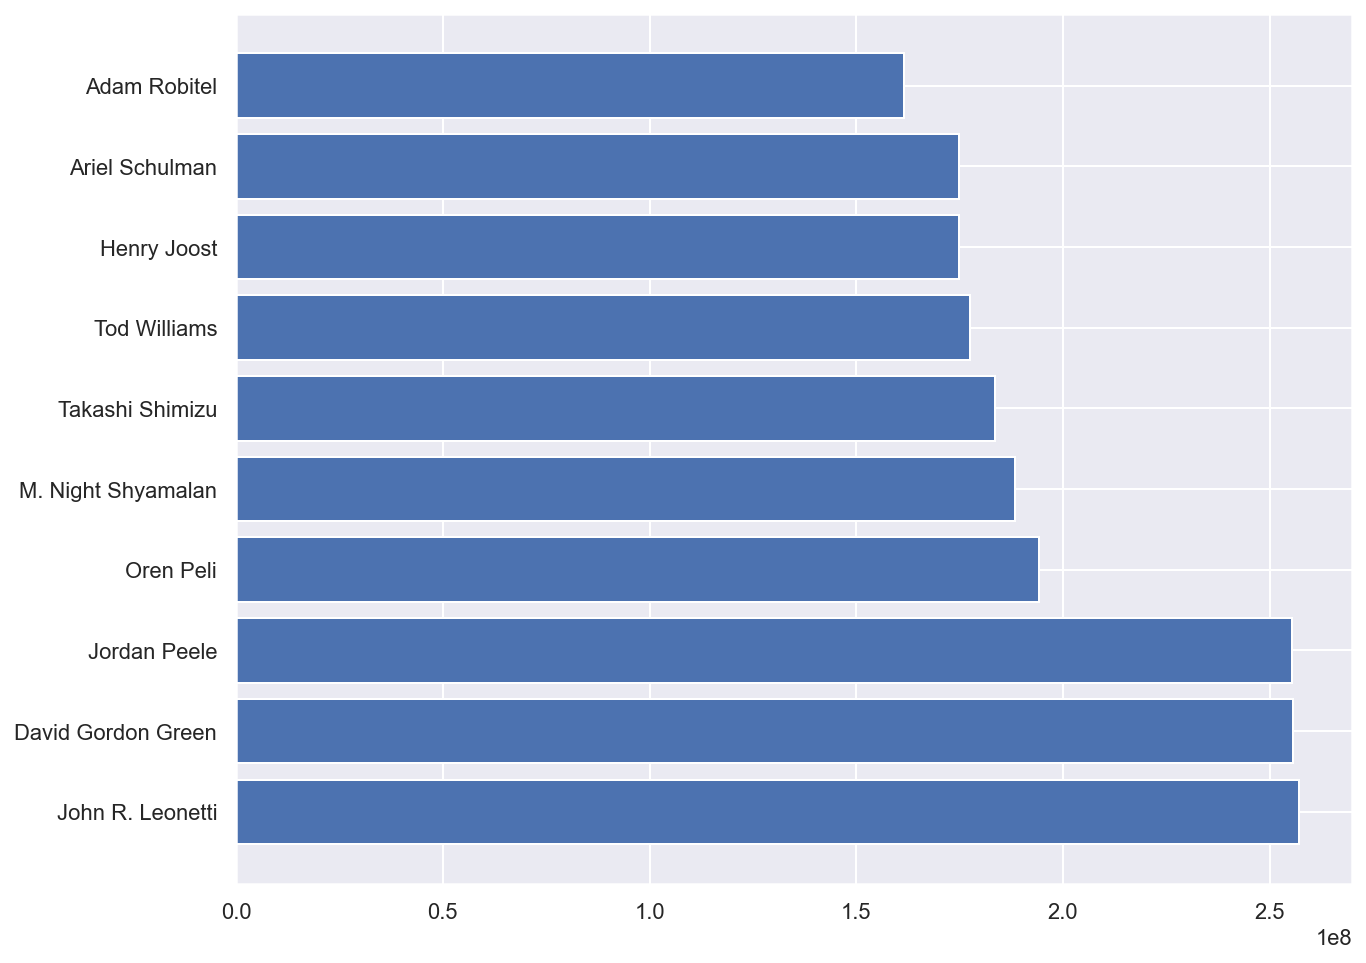

In [81]:
plt.figure(figsize=(10,8))
plt.barh(best_directors_low['name'],best_directors_low['revenue'])
plt.show()

<!--comment -->

A continuaci√≥n se muestra la pel√≠cula del director que ha obtenido m√°s beneficios que, seg√∫n parece, tambi√©n es protagonista de la pel√≠cula.

In [82]:
# people_id del director
best_director_id = best_directors_low.iloc[0].name
# Cr√©ditos de las pel√≠culas de ese director y que est√©n en df_movies_low
movies_bd = (df_credits[(df_credits['people_id']==best_director_id) & 
                       (df_credits['movie_id'].isin(df_movies_low.index))]
                       ['movie_id'])
# Pel√≠culas
df_movies.loc[movies_bd]

title  avg_rating  num_votes     budget    revenue  popularity  \
movie_id                                                                        
tt3322940  Annabelle         5.4     160448  6500000.0  257047661      85.045   

          release_date  
movie_id                
tt3322940   2014-10-02

Podemos mostrar el cartel de la pel√≠cula que ha catapultado al √©xito (al menos econ√≥mico) a este director.

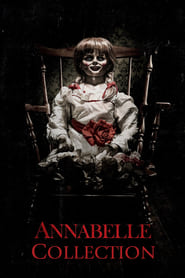

In [83]:
from IPython.display import Image

Image('http://image.tmdb.org/t/p/w185//8ouiyGYcv3E1JPrPrC7pLjxlDhC.jpg')

Un modo quiz√° m√°s justo de calcular la rentabilidad de una pel√≠cula es el ratio `revenue`/`budget` (para obtener este dato, es necesario considerar solamente las pel√≠culas con `revenue>0` y `budget>0`, pero en primer apartado se eliminaron las que no cumpl√≠an la condici√≥n). Obtener los 10 directores que han generado un mayor beneficio seg√∫n este criterio. 

  
Mostrar una gr√°fica, similar a la anterior, con esta informaci√≥n. En lugar de utilizar `revenue`, hay que calcular primero una nueva columna, denominada `rent` con la beneficio/presupuesto, y mostrar los datos corrspondientes a esta nueva columna.

 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se trata de ***repetir*** el primer apartado del ejercicio, pero creando una nueva columna denominada `df_movies_low['rent']` el ratio entre recaudaci√≥n y presupuesto, y utilizando  esta columna para crear otra vez `best_directors_low`.
</details>  

In [84]:
df_movies_low=df_movies_low.assign(rent=lambda x: x.revenue/x.budget)

In [85]:
df_dir_mov_low = pd.merge(df_credits_dir,df_movies_low['rent'],on='movie_id',how='right')
df_dir_mov_low = df_dir_mov_low.groupby('people_id')['rent'].mean()
df_dir_mov_low = df_dir_mov_low.nlargest(10)
df_dir_mov_low = df_dir_mov_low.to_frame('rent')
df_dir_mov_low.head()

rent
people_id            
90591      903.176902
640        420.522723
76624       77.919429
1932296     75.462037
86688       62.882090

In [86]:
best_directors_low = pd.merge(df_people,df_dir_mov_low,on='people_id',how='right')
best_directors_low = best_directors_low[['rent','name','popularity','gender']]

best_directors_low

rent              name  popularity  gender
people_id                                                  
90591      903.176902         Oren Peli       1.177       2
640        420.522723      Chris Kentis       1.400       2
76624       77.919429     Shane Carruth       0.840       2
1932296     75.462037   Aneesh Chaganty       0.828       2
86688       62.882090   Levan Gabriadze       1.400       2
2127        61.155275         James Wan      14.339       2
20133       59.170677      Tod Williams       1.658       2
291263      56.757326      Jordan Peele      12.006       2
26714       39.545794  John R. Leonetti       3.716       2
999812      38.390020    Bradley Parker       1.663       2

<!--comment -->

Crear una gr√°fica de barras (horizontal) con los valores `rent` para cada director en `best_directors_low`.

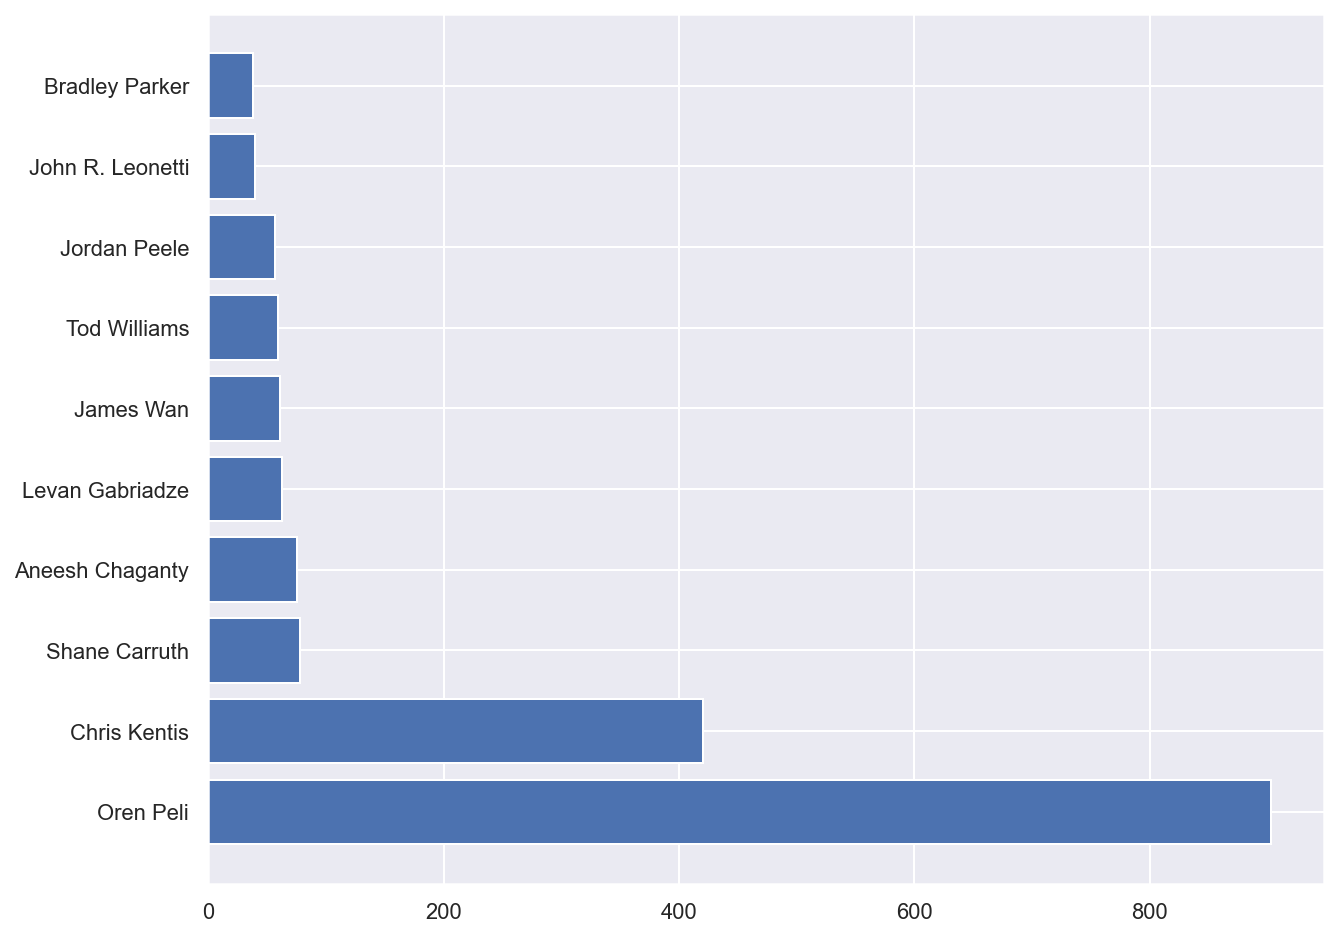

In [87]:
plt.figure(figsize=(10,8))
plt.barh(best_directors_low['name'],best_directors_low['rent'])
plt.show()

<!--comment -->

En este sentido, hay un director y pel√≠cula que destaca sobre muy por encima de los dem√°s.  

title  avg_rating  num_votes    budget    revenue  \
movie_id                                                                     
tt1179904  Paranormal Activity         6.3     241286  215000.0  194183034   

           popularity release_date  
movie_id                            
tt1179904      89.234   2007-09-14

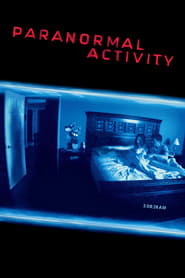

In [88]:
# people_id del director
best_director_id = best_directors_low.iloc[0].name
# Cr√©ditos de las pel√≠culas de ese director y que est√©n en df_movies_low
movies_bd = (df_credits[(df_credits['people_id']==best_director_id) & 
                       (df_credits['movie_id'].isin(df_movies_low.index))]
                       ['movie_id'])
# Pel√≠culas
display(df_movies.loc[movies_bd])

Image('http://image.tmdb.org/t/p/w185/1bjA7de4O0NhMsaOqwvrecophUs.jpg')

Una vez estudiados los directores, procederemos a estudiar el reparto.  En este caso, se comenzar√° qu√© actores o actrices participan en pel√≠culas con m√°s ingresos.  


 Obtener los nombres de los 20 actores/actrices cuyas pel√≠culas generan, por t√©rmino medio, una mayor cantidad de ingresos. Almacenar el resultado en un *DataFrame* denominado `best_cast_low`.
 
 
  <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* El ejercicio es similar al anterior, pero hay que cambiar el `rol` y seleccionar las entradas correspondientes a `cast`. 
</details>  
  


In [89]:
df_cast_mov_low = (
                    pd.merge(df_credits_cast,df_movies_low['revenue'],on='movie_id',how='right')
                      .groupby('people_id')['revenue'].mean()
                      .nlargest(20)
                      .to_frame('revenue')
)

df_cast_mov_low.head()


revenue
people_id             
5530       278454358.0
52462      278454358.0
115290     257591776.0
556435     257591776.0
34842      257047661.0

In [90]:
best_cast_low = pd.merge(df_people,df_cast_mov_low,on='people_id',how='right')
best_cast_low = best_cast_low[['revenue','name','popularity','gender']]

best_cast_low

revenue                   name  popularity  gender
people_id                                                        
5530       278454358.0           James McAvoy      36.130       2
52462      278454358.0          Betty Buckley       4.241       1
115290     257591776.0           Lee Sun-kyun       7.180       2
556435     257591776.0          Cho Yeo-jeong      14.593       1
34842      257047661.0          Tony Amendola       5.333       2
82809      257047661.0       Annabelle Wallis      34.983       1
94436      257047661.0            Ward Horton       5.232       2
8944       255614941.0       Jamie Lee Curtis      21.423       1
20750      255614941.0             Judy Greer      29.080       1
1511997    255614941.0          Andi Matichak      12.880       1
2229       255407969.0       Catherine Keener      16.190       1
206919     255407969.0         Daniel Kaluuya      14.460       2
1255540    255407969.0       Allison Williams      10.818       1
176748     207039844.0         Lauren Bittner       4.090       1
90597      194183034.0            Micah Sloat       1.731       2
90598      194183034.0         Mark Fredrichs       1.400       2
118243     192275938.0        Sprague Grayden       7.440       1
11863      183474602.0  Sarah Michelle Gellar      13.653       1
15338      183474602.0       William Mapother      10.038       2
20386      183474602.0             Jason Behr       7.468       2

<!--comment -->

Crear una gr√°fica de barras (horizontal) con los valores `revenue` para cada director en `best_cast_low`.

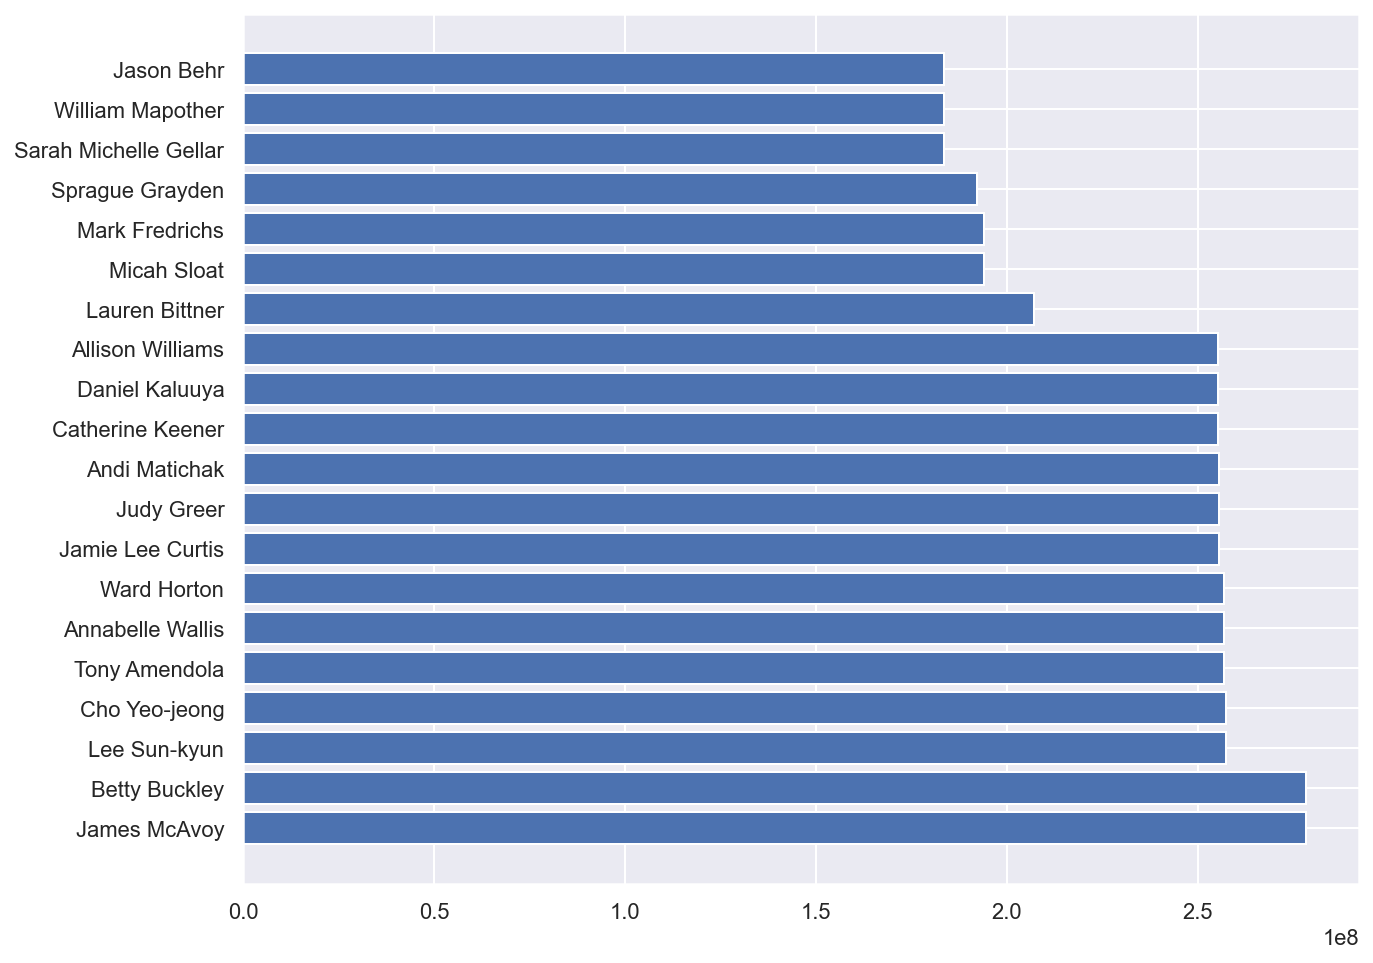

In [91]:
plt.figure(figsize=(10,8))
plt.barh(best_cast_low['name'],best_cast_low['revenue'])
plt.show()

<!--comment -->

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

En ejercicio anterior se muestra un reparto m√°s o menos equitativo entre actores y actrices para los 10 miembros del reparto que est√°n ligados a mayor beneficio.  Sin embargo, se estudiar√° algo m√°s este factor (g√©nero).

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 11</font> 

Crear un *DataFrame* denominado `cast_low`, similar al anterior, con el beneficio medio (`revenue`) asociado a cada actor, su nombre (`name`), popularidad (`popularity`) y g√©nero (`gender`). 


 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Es similar al anterior, pero en lugar de acceder a los mayores valores, se devuelven todos las filas.
</details>  

In [92]:
cast_low = (
                    pd.merge(df_credits_cast,df_movies_low['revenue'],on='movie_id',how='right')
                      .groupby('people_id')['revenue'].mean()
                      .to_frame('revenue')
                      
)

cast_low = pd.merge(df_people,cast_low,on='people_id',how='right')
cast_low = cast_low[['revenue','name','popularity','gender']]
cast_low

revenue                name  popularity  gender
people_id                                                     
34         118587880.0  Mykelti Williamson      14.914       2
49         148868835.0         Maria Bello      20.875       1
63          47709193.0      Milla Jovovich      28.979       1
100         82391145.0      Scott Speedman      20.602       2
112         12008642.0      Cate Blanchett      18.590       1
...                ...                 ...         ...     ...
2037046      1088907.0     Souheila Yacoub       3.065       1
2041838      1088907.0   Romain Guillermic       0.602       2
2048372     51749995.0       Diana Silvers      13.341       1
2309944     18123239.0    Valeriia Karaman       1.980       1
2396546     53785551.0       Madelyn Grace       7.609       1

[545 rows x 4 columns]

A partir del *DataFrame* `cast_low`, obtener un gr√°fico de barras mostrando el n√∫mero actores de cada g√©nero.

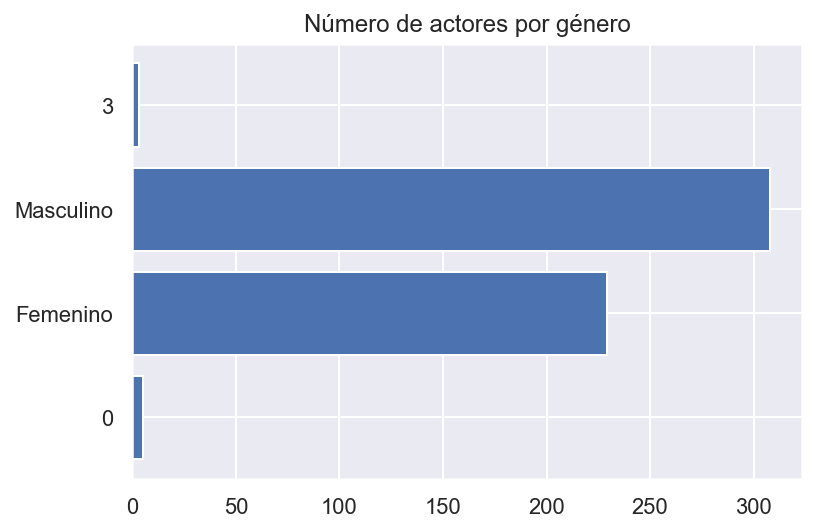

In [93]:
generos = cast_low.groupby('gender')['name'].count()
fig, ax = plt.subplots()
ax.barh(range(len(generos)), generos.values, tick_label=generos.index)
ax.set_title('N√∫mero de actores por g√©nero')
ax.set_yticklabels(['0','Femenino','Masculino','3'])
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Se aprecia que el n√∫mero de actores es mayor que el de actrices. Cabe preguntarse si hay alg√∫n tipo de diferencia en la recaudaci√≥n vinculada al g√©nero de los actores. 

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 12</font> 

Mostrar la distribuci√≥n de `cast_low` para los g√©neros 1 (mujer) y 2 (hombre). 

 <br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Se puede hacer un `sns.displot` con `cast_low` filtrando previamente por g√©nero para que solo contemple esos dos (mayoritarios).
* El color se puede utilizar para distinguir ambas distribuciones.    
</details>  

In [124]:
cast_low.head()

revenue                name  popularity  gender
people_id                                                     
34         118587880.0  Mykelti Williamson      14.914       2
49         148868835.0         Maria Bello      20.875       1
63          47709193.0      Milla Jovovich      28.979       1
100         82391145.0      Scott Speedman      20.602       2
112         12008642.0      Cate Blanchett      18.590       1

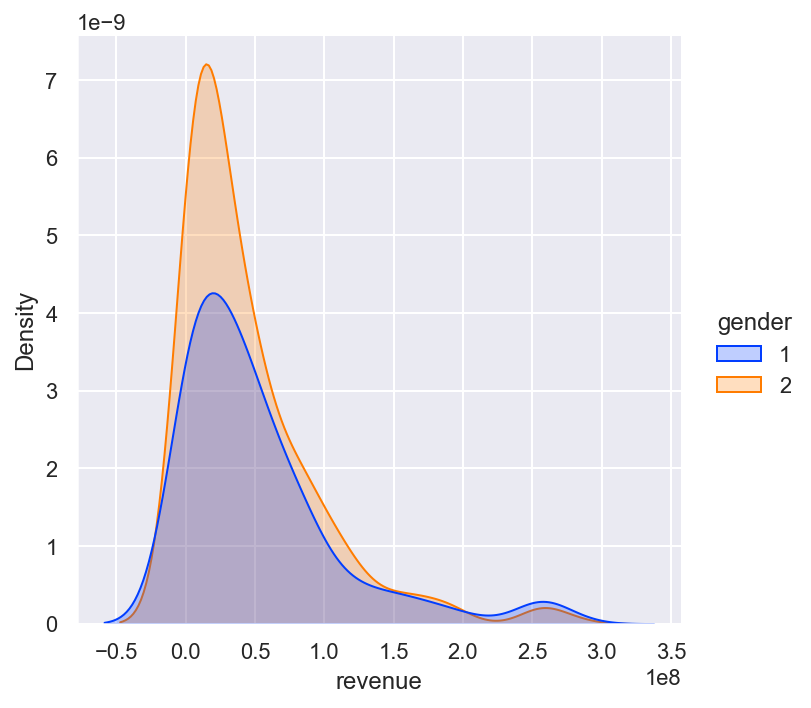

In [155]:
sns.displot(data=cast_low.query('gender == 1|gender == 2'),x='revenue', hue='gender', kind='kde', fill=True, palette=sns.color_palette('bright', n_colors=2))
plt.show()

<!--comment -->

En principio se aprecia alguna diferencia en las distribuciones, pero no est√° claro que haya una diferencia en la recaudaci√≥n media. Se puede verificar este hecho mediante un test U de Mann-Whitney. Si fijamos un nivel de significancia del 95% ¬øpuede afirmarse que son iguales los sueldos medios?

In [117]:
grupo_1 = cast_low.query('gender == 1')
grupo_2 = cast_low.query('gender == 2')

In [126]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(grupo_1['revenue'], grupo_2['revenue'])
print(f'stat={stat:.3f}, p={p:.3f}')

stat=37239.000, p=0.267


`Comentar el resultado (contestar a las preguntas) en esta celda`

El resultado del test nos indica que no hay una diferencia significativa entre los sueldos medios de actores y actrices, con lo que podr√≠amos decir que son iguales. Es posible que haya una diferencia entre los sueldos medios, pero esa diferencia es demasiado peque√±a para considerarse estad√≠sticamente significativa.
<br><br><br>

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Se percibe que, a pesar de que aparecen m√°s actores que actrices, parece que en las pel√≠culas con los beneficios m√°s altos no hay diferencia o incluso aparecen m√°s actrices que actores.  El test refleja que en general no hay diferencias en las recaudaciones de las pel√≠culas en que participan unos y otros.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section6"></a>
## <font color="#00586D"> 6. Conclusi√≥n</font>
<br>

En este trabajo se part√≠a de dos bases de datos de pel√≠culas y gente, y el objetivo era estudiar qu√© factores est√°n m√°s relacionados con el √©xito de una pel√≠cula, que se mide por los ingresos que genera. Desde el principio, ha quedado claro que el presupuesto es el factor m√°s importante,  que los g√©neros en que m√°s dinero se gasta en la producci√≥n son la animaci√≥n, fantas√≠a, etc., y que √©stos son tambi√©n los que m√°s recaudaci√≥n obtienen.  Tambi√©n se ha comprobado que la informaci√≥n relativa a popularidad de directores y actores __no__ parece un factor muy relevante. 
<br>

No obstante se ha limitado el estudio al periodo actual y al (relativamente bajo) presupuesto disponible. En ese sentido, se ha comprobado que las pel√≠culas m√°s rentables son aquellas que pertenecen a los g√©neros de terror, suspense, etc. Tambi√©n se ha descubierto que pel√≠culas como "Paranormal Activity" generan unos ingresos extraordinariamente altos en proporci√≥n con la inversi√≥n.  
<br>


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>